In [1]:
import os
from joblib import Parallel, delayed
import time
import numpy as np
import pickle
import pylab as pl
import pandas as pd

# import jupyternotify
import subprocess
import concurrent.futures
import shutil

In [73]:
regions = ['us-central1-a', 'europe-west3-c', 'asia-south1-c']

In [74]:
for i in [0,1,2]:
    

    cmd = 'gcloud compute instances create flwr-'+f"{i:03}"+' \
    --project=ucr-ursa-major-lesani-lab \
    --zone='+regions[i]+' \
    --machine-type=e2-highcpu-8 \
    --network-interface=network-tier=PREMIUM,stack-type=IPV4_ONLY,subnet=default \
    --maintenance-policy=MIGRATE \
    --provisioning-model=STANDARD \
    --service-account=961693926925-compute@developer.gserviceaccount.com \
    --scopes=https://www.googleapis.com/auth/devstorage.read_only,https://www.googleapis.com/auth/logging.write,https://www.googleapis.com/auth/monitoring.write,https://www.googleapis.com/auth/service.management.readonly,https://www.googleapis.com/auth/servicecontrol,https://www.googleapis.com/auth/trace.append \
    --create-disk=auto-delete=yes,boot=yes,device-name=instance-20240829-120659,image=projects/debian-cloud/global/images/debian-12-bookworm-v20240815,mode=rw,size=30,type=pd-balanced \
    --no-shielded-secure-boot \
    --shielded-vtpm \
    --shielded-integrity-monitoring \
    --labels=goog-ec-src=vm_add-gcloud \
    --reservation-affinity=any'
    
    os.system(cmd)

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-central1-a/instances/flwr-000].
 - Disk size: '30 GB' is larger than image size: '10 GB'. You might need to resize the root repartition manually if the operating system does not support automatic resizing. See https://cloud.google.com/compute/docs/disks/add-persistent-disk#resize_pd for details.



NAME      ZONE           MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP    EXTERNAL_IP   STATUS
flwr-000  us-central1-a  e2-highcpu-8               10.128.15.214  34.72.52.250  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/flwr-001].
 - Disk size: '30 GB' is larger than image size: '10 GB'. You might need to resize the root repartition manually if the operating system does not support automatic resizing. See https://cloud.google.com/compute/docs/disks/add-persistent-disk#resize_pd for details.



NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
flwr-001  europe-west3-c  e2-highcpu-8               10.156.0.29  35.198.72.77  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/asia-south1-c/instances/flwr-002].
 - Disk size: '30 GB' is larger than image size: '10 GB'. You might need to resize the root repartition manually if the operating system does not support automatic resizing. See https://cloud.google.com/compute/docs/disks/add-persistent-disk#resize_pd for details.



NAME      ZONE           MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
flwr-002  asia-south1-c  e2-highcpu-8               10.160.0.32  35.200.186.214  RUNNING


In [75]:
os.system('git add .; git commit -m "fc"; git push origin')

[main f4232a1f] fc
 4 files changed, 42155 insertions(+), 63496 deletions(-)


To github.com:tejas-shivanand-mane/flower.git
   bc4dd192..f4232a1f  main -> main


0

In [16]:
def initialize(i):
    command = 'gcloud compute ssh --zone "'+regions[i]+'" "flwr-'+f"{i:03}"+'" --project "ucr-ursa-major-lesani-lab" --command "sudo apt -y install git; git clone https://github.com/tejas-shivanand-mane/flower.git;cd flower"'
    os.system(command)

In [17]:
def git_pull(i):
    command = 'gcloud compute ssh --zone "'+regions[i]+'" "flwr-'+f"{i:03}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd flower; git pull;"'
    os.system(command)

In [18]:
def setup(i):
    command = 'gcloud compute ssh --zone "'+regions[i]+'" "flwr-'+f"{i:03}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd flower; sudo sh setup.sh"'
    os.system(command)

In [19]:
def clean(i):
    command = 'gcloud compute ssh --zone "us-central1-a" "flwr-'+f"{i:03}"+'" --project "ucr-ursa-major-lesani-lab" --command "sudo rm -r flower"'
    os.system(command)

In [13]:
time.sleep(45)

In [76]:
results = Parallel(n_jobs=60)(delayed(initialize)(i) for i in range(3))

Reading package lists...
Building dependency tree...
Reading state information...
Reading package lists...

The following additional packages will be installed:
  git-man liberror-perl patch
Suggested packages:
  git-daemon-run | git-daemon-sysvinit git-doc git-email git-gui gitk gitweb
  git-cvs git-mediawiki git-svn ed diffutils-doc
The following NEW packages will be installed:
  git git-man liberror-perl patch
0 upgraded, 4 newly installed, 0 to remove and 0 not upgraded.
Need to get 9377 kB of archives.
After this operation, 48.0 MB of additional disk space will be used.
Get:1 file:/etc/apt/mirrors/debian.list Mirrorlist [30 B]
Get:2 https://deb.debian.org/debian bookworm/main amd64 liberror-perl all 0.17029-2 [29.0 kB]
Get:3 https://deb.debian.org/debian bookworm/main amd64 git-man all 1:2.39.2-1.1 [2049 kB]
Get:4 https://deb.debian.org/debian bookworm/main amd64 git amd64 1:2.39.2-1.1 [7171 kB]
Get:5 https://deb.debian.org/debian bookworm/main amd64 patch amd64 2.7.6-7 [128 kB]

Building dependency tree...
Reading state information...
The following additional packages will be installed

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package liberror-perl.
0 upgraded, 4 newly installed, 0 to remove and 0 not upgraded.
Need to get 9377 kB of archives.
After this operation, 48.0 MB of additional disk space will be used.
Get:1 file:/etc/apt/mirrors/debian.list Mirrorlist [30 B]
Get:2 https://deb.debian.org/debian bookworm/main amd64 liberror-perl all 0.17029-2 [29.0 kB]
Get:3 https://deb.debian.org/debian bookworm/main amd64 git-man all 1:2.39.2-1.1 [2049 kB]
Get:4 https://deb.debian.org/debian bookworm/main amd64 git amd64 1:2.39.2-1.1 [7171 kB]
Get:5 https://deb.debian.org/debian bookworm/main amd64 patch amd64 2.7.6-7 [128 kB]
(Reading database ... 69231 files and directories currently installed.)
Preparing to unpack .../liberror-perl_0.17029-2_all.deb ...
Unpacking liberror-perl (0.17029-2) ...
Selecting previously unselected package git-man.
Preparing to unpack .../git-man_1%3a2.39.2-1.1_all.deb ...
Unpacking git-man (1:2.39.2-1.1) ...


Reading package lists...Selecting previously unselected package git.
Preparing to unpack .../git_1%3a2.39.2-1.1_amd64.deb ...
Unpacking git (1:2.39.2-1.1) ...
Fetched 9377 kB in 0s (51.2 MB/s)
Selecting previously unselected package liberror-perl.


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


(Reading database ... 69231 files and directories currently installed.)
Preparing to unpack .../liberror-perl_0.17029-2_all.deb ...
Unpacking liberror-perl (0.17029-2) ...
Selecting previously unselected package git-man.
Preparing to unpack .../git-man_1%3a2.39.2-1.1_all.deb ...
Unpacking git-man (1:2.39.2-1.1) ...

Building dependency tree...Selecting previously unselected package patch.
Preparing to unpack .../patch_2.7.6-7_amd64.deb ...
Unpacking patch (2.7.6-7) ...
Setting up liberror-perl (0.17029-2) ...
Selecting previously unselected package git.
Setting up patch (2.7.6-7) ...
Preparing to unpack .../git_1%3a2.39.2-1.1_amd64.deb ...
Setting up git-man (1:2.39.2-1.1) ...
Unpacking git (1:2.39.2-1.1) ...
Setting up git (1:2.39.2-1.1) ...
Processing triggers for man-db (2.11.2-2) ...

Reading state information...
The following additional packages will be installed:
  git-man liberror-perl patch
Suggested packages:
  git-daemon-run | git-daemon-sysvinit git-doc git-email git-gui git

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Fetched 9377 kB in 0s (26.0 MB/s)
Selecting previously unselected package liberror-perl.
(Reading database ... 69231 files and directories currently installed.)
Preparing to unpack .../liberror-perl_0.17029-2_all.deb ...
Unpacking liberror-perl (0.17029-2) ...
Selecting previously unselected package git-man.
Preparing to unpack .../git-man_1%3a2.39.2-1.1_all.deb ...
Unpacking git-man (1:2.39.2-1.1) ...
Selecting previously unselected package git.
Preparing to unpack .../git_1%3a2.39.2-1.1_amd64.deb ...
Unpacking git (1:2.39.2-1.1) ...
Selecting previously unselected package patch.
Preparing to unpack .../patch_2.7.6-7_amd64.deb ...
Unpacking patch (2.7.6-7) ...
Setting up liberror-perl (0.17029-2) ...
Setting up patch (2.7.6-7) ...
Setting up git-man (1:2.39.2-1.1) ...
Setting up git (1:2.39.2-1.1) ...
Processing triggers for man-db (2.11.2-2) ...


Cloning into 'flower'...
Cloning into 'flower'...
Cloning into 'flower'...


In [84]:
os.system('git add .; git commit -m "fc"; git push origin')
results = Parallel(n_jobs=60)(delayed(git_pull)(i) for i in range(3))

[main 4d4ce9c1] fc
 1 file changed, 1 insertion(+), 1 deletion(-)


To github.com:tejas-shivanand-mane/flower.git
   ecb78c24..4d4ce9c1  main -> main
From https://github.com/tejas-shivanand-mane/flower
   ecb78c24..4d4ce9c1  main       -> origin/main


Updating ecb78c24..4d4ce9c1
Fast-forward
 examples/logisticIris/server.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


From https://github.com/tejas-shivanand-mane/flower
   ecb78c24..4d4ce9c1  main       -> origin/main


Updating ecb78c24..4d4ce9c1
Fast-forward
 examples/logisticIris/server.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


From https://github.com/tejas-shivanand-mane/flower
   ecb78c24..4d4ce9c1  main       -> origin/main


Updating ecb78c24..4d4ce9c1
Fast-forward
 examples/logisticIris/server.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [78]:
results = Parallel(n_jobs=60)(delayed(setup)(i) for i in range(3))

Get:1 file:/etc/apt/mirrors/debian.list Mirrorlist [30 B]
Get:5 file:/etc/apt/mirrors/debian-security.list Mirrorlist [39 B]
Get:7 https://packages.cloud.google.com/apt google-compute-engine-bookworm-stable InRelease [1321 B]
Get:8 https://packages.cloud.google.com/apt cloud-sdk-bookworm InRelease [1654 B]
Get:2 https://deb.debian.org/debian bookworm InRelease [151 kB]
Get:9 https://packages.cloud.google.com/apt google-compute-engine-bookworm-stable/main amd64 Packages [3128 B]
Get:3 https://deb.debian.org/debian bookworm-updates InRelease [55.4 kB]
Get:4 https://deb.debian.org/debian bookworm-backports InRelease [56.6 kB]
Get:6 https://deb.debian.org/debian-security bookworm-security InRelease [48.0 kB]
Get:10 https://packages.cloud.google.com/apt cloud-sdk-bookworm/main amd64 Packages [3282 kB]
Get:11 https://deb.debian.org/debian bookworm/main Sources [9487 kB]
Get:14 https://packages.cloud.google.com/apt cloud-sdk-bookworm/main all Packages [1538 kB]
Get:12 https://deb.debian.org/d

Get:1 file:/etc/apt/mirrors/debian.list Mirrorlist [30 B]
Get:5 file:/etc/apt/mirrors/debian-security.list Mirrorlist [39 B]
Get:2 https://deb.debian.org/debian bookworm InRelease [151 kB]
Get:3 https://deb.debian.org/debian bookworm-updates InRelease [55.4 kB]
Get:4 https://deb.debian.org/debian bookworm-backports InRelease [56.6 kB]
Get:6 https://deb.debian.org/debian-security bookworm-security InRelease [48.0 kB]
Get:7 https://packages.cloud.google.com/apt google-compute-engine-bookworm-stable InRelease [1321 B]
Get:8 https://packages.cloud.google.com/apt cloud-sdk-bookworm InRelease [1654 B]
Get:9 https://deb.debian.org/debian bookworm/main Sources [9487 kB]
Get:10 https://deb.debian.org/debian bookworm/main amd64 Packages [8787 kB]
Get:11 https://deb.debian.org/debian bookworm/main Translation-en [6109 kB]
Get:12 https://deb.debian.org/debian bookworm-backports/main Sources.diff/Index [63.3 kB]
Get:13 https://deb.debian.org/debian bookworm-backports/main amd64 Packages.diff/Index 

Get:2 https://deb.debian.org/debian bookworm InRelease [151 kB]
Get:3 https://deb.debian.org/debian bookworm-updates InRelease [55.4 kB]
Get:23 https://packages.cloud.google.com/apt cloud-sdk-bookworm/main amd64 Packages [3282 kB]
Get:4 https://deb.debian.org/debian bookworm-backports InRelease [56.6 kB]
Get:7 https://packages.cloud.google.com/apt google-compute-engine-bookworm-stable InRelease [1321 B]
Get:6 https://deb.debian.org/debian-security bookworm-security InRelease [48.0 kB]
Get:8 https://deb.debian.org/debian bookworm/main Sources [9487 kB]
Get:9 https://deb.debian.org/debian bookworm/main amd64 Packages [8787 kB]
Get:14 https://packages.cloud.google.com/apt cloud-sdk-bookworm InRelease [1654 B]
Get:15 https://packages.cloud.google.com/apt google-compute-engine-bookworm-stable/main amd64 Packages [3128 B]
Get:10 https://deb.debian.org/debian bookworm/main Translation-en [6109 kB]
Get:11 https://deb.debian.org/debian bookworm-backports/main Sources.diff/Index [63.3 kB]
Get:12


Reading state information...
Fetched 30.2 MB in 4s (8334 kB/s)
Reading package lists...Get:23 https://packages.cloud.google.com/apt cloud-sdk-bookworm/main amd64 Packages [3282 kB]
The following additional packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu bzip2 cpp cpp-12 dpkg-dev
  fakeroot fontconfig-config fonts-dejavu-core g++ g++-12 gcc gcc-12
  libabsl20220623 libalgorithm-diff-perl libalgorithm-diff-xs-perl
  libalgorithm-merge-perl libaom3 libasan8 libatomic1 libavif15 libbinutils
  libc-bin libc-dev-bin libc-devtools libc6 libc6-dev libcc1-0 libcrypt-dev
  libctf-nobfd0 libctf0 libdav1d6 libde265-0 libdeflate0 libdpkg-perl
  libfakeroot libfile-fcntllock-perl libfontconfig1 libgav1-1 libgcc-12-dev
  libgd3 libgomp1 libgprofng0 libheif1 libisl23 libitm1 libjansson4 libjbig0
  libjpeg62-turbo liblerc4 liblocale-gettext-perl liblsan0 libmpc3 libmpfr6
  libnsl-dev libnuma1 libquadmath0 librav1e0 libstdc++-12-dev libsvtav1enc1
  libtiff6 libtirpc-dev


Building dependency tree...
Reading state information...

Reading state information...
33 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...
Building dependency tree...

The following additional packages will be installed:

Reading state information...
  binutils binutils-common binutils-x86-64-linux-gnu bzip2 cpp cpp-12 dpkg-dev
  fakeroot fontconfig-config fonts-dejavu-core g++ g++-12 gcc gcc-12
  libabsl20220623 libalgorithm-diff-perl libalgorithm-diff-xs-perl
  libalgorithm-merge-perl libaom3 libasan8 libatomic1 libavif15 libbinutils
  libc-bin libc-dev-bin libc-devtools libc6 libc6-dev libcc1-0 libcrypt-dev
  libctf-nobfd0 libctf0 libdav1d6 libde265-0 libdeflate0 libdpkg-perl
  libfakeroot libfile-fcntllock-perl libfontconfig1 libgav1-1 libgcc-12-dev
  libgd3 libgomp1 libgprofng0 libheif1 libisl23 libitm1 libjansson4 libjbig0
  libjpeg62-turbo liblerc4 liblocale-gettext-perl liblsan0 libmpc3 libmpfr6
  libnsl-dev libnuma1 libquadmath0 librav1e0 libstdc++-12-dev libsvtav1enc1
  libtiff6 libtirpc-dev libtsan2 libubsan1 libwebp7 libx11-6 libx11-data
  libx265-199 libxau6 libxcb1 libxdmcp6 libxpm4 libyuv0 linux-libc-dev make
  manpages-dev rpcsvc-prot

Get:3 https://deb.debian.org/debian bookworm/main amd64 libc-bin amd64 2.36-9+deb12u8 [608 kB]
Get:4 https://deb.debian.org/debian bookworm/main amd64 liblocale-gettext-perl amd64 1.07-5 [15.4 kB]
Get:5 https://deb.debian.org/debian bookworm/main amd64 bzip2 amd64 1.0.8-5+b1 [49.8 kB]
Get:6 https://deb.debian.org/debian bookworm/main amd64 binutils-common amd64 2.40-2 [2487 kB]
Get:37 https://deb.debian.org/debian bookworm/main amd64 gcc amd64 4:12.2.0-3 [5216 B]
Get:38 https://deb.debian.org/debian bookworm/main amd64 libstdc++-12-dev amd64 12.2.0-14 [2046 kB]
Get:39 https://deb.debian.org/debian bookworm/main amd64 g++-12 amd64 12.2.0-14 [10.7 MB]
Get:7 https://deb.debian.org/debian bookworm/main amd64 libbinutils amd64 2.40-2 [572 kB]
Get:8 https://deb.debian.org/debian bookworm/main amd64 libctf-nobfd0 amd64 2.40-2 [153 kB]
Get:9 https://deb.debian.org/debian bookworm/main amd64 libctf0 amd64 2.40-2 [89.8 kB]
Get:10 https://deb.debian.org/debian bookworm/main amd64 libgprofng0 amd6

apt-listchanges: Reading changelogs...
Fetched 83.2 MB in 1s (118 MB/s)


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


(Reading database ... 70337 files and directories currently installed.)
Preparing to unpack .../libc6_2.36-9+deb12u8_amd64.deb ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
apt-listchanges: Reading changelogs...
Unpacking libc6:amd64 (2.36-9+deb12u8) over (2.36-9+deb12u7) ...
Fetched 83.2 MB in 1s (81.4 MB/s)
(Reading database ... 70337 files and directories currently installed.)
Preparing to unpack .../libc6_2.36-9+deb12u8_amd64.deb ...


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
Setting up libc6:amd64 (2.36-9+deb12u8) ...
Unpacking libc6:amd64 (2.36-9+deb12u8) over (2.36-9+deb12u7) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
Setting up libc6:amd64 (2.36-9+deb12u8) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or wi

Selecting previously unselected package cpp-12.
Preparing to unpack .../20-cpp-12_12.2.0-14_amd64.deb ...
Unpacking cpp-12 (12.2.0-14) ...
Selecting previously unselected package cpp.
Preparing to unpack .../21-cpp_4%3a12.2.0-3_amd64.deb ...
Unpacking cpp (4:12.2.0-3) ...
Selecting previously unselected package libcc1-0:amd64.
Preparing to unpack .../22-libcc1-0_12.2.0-14_amd64.deb ...
Unpacking libcc1-0:amd64 (12.2.0-14) ...
Selecting previously unselected package libgomp1:amd64.
Preparing to unpack .../23-libgomp1_12.2.0-14_amd64.deb ...
Unpacking libgomp1:amd64 (12.2.0-14) ...
Selecting previously unselected package libitm1:amd64.
Selecting previously unselected package cpp.
Preparing to unpack .../21-cpp_4%3a12.2.0-3_amd64.deb ...
Unpacking cpp (4:12.2.0-3) ...
Preparing to unpack .../24-libitm1_12.2.0-14_amd64.deb ...
Unpacking libitm1:amd64 (12.2.0-14) ...
Selecting previously unselected package libatomic1:amd64.
Preparing to unpack .../25-libatomic1_12.2.0-14_amd64.deb ...
Unpac

Selecting previously unselected package dpkg-dev.
Preparing to unpack .../39-dpkg-dev_1.21.22_all.deb ...
Unpacking dpkg-dev (1.21.22) ...
Get:40 https://deb.debian.org/debian bookworm/main amd64 g++ amd64 4:12.2.0-3 [1356 B]
Get:41 https://deb.debian.org/debian bookworm/main amd64 make amd64 4.3-4.1 [396 kB]
Selecting previously unselected package libsvtav1enc1:amd64.
Preparing to unpack .../53-libsvtav1enc1_1.4.1+dfsg-1_amd64.deb ...
Unpacking libsvtav1enc1:amd64 (1.4.1+dfsg-1) ...
Get:42 https://deb.debian.org/debian bookworm/main amd64 libdpkg-perl all 1.21.22 [603 kB]
Get:43 https://deb.debian.org/debian bookworm/main amd64 dpkg-dev all 1.21.22 [1353 kB]
Selecting previously unselected package build-essential.
Preparing to unpack .../40-build-essential_12.9_amd64.deb ...
Unpacking build-essential (12.9) ...
Selecting previously unselected package libjpeg62-turbo:amd64.
Selecting previously unselected package libfakeroot:amd64.
Preparing to unpack .../54-libjpeg62-turbo_1%3a2.1.5-2

Unpacking libgd3:amd64 (2.3.3-9) ...
Selecting previously unselected package libsvtav1enc1:amd64.
Preparing to unpack .../53-libsvtav1enc1_1.4.1+dfsg-1_amd64.deb ...
Unpacking libsvtav1enc1:amd64 (1.4.1+dfsg-1) ...
Selecting previously unselected package libc-devtools.
Get:76 https://deb.debian.org/debian bookworm/main amd64 libxpm4 amd64 1:3.5.12-1.1+deb12u1 [48.6 kB]
Preparing to unpack .../74-libc-devtools_2.36-9+deb12u8_amd64.deb ...
Get:77 https://deb.debian.org/debian bookworm/main amd64 libgd3 amd64 2.3.3-9 [124 kB]
Unpacking libc-devtools (2.36-9+deb12u8) ...
Get:78 https://deb.debian.org/debian bookworm/main amd64 libc-devtools amd64 2.36-9+deb12u8 [53.9 kB]
Get:79 https://deb.debian.org/debian bookworm/main amd64 libfile-fcntllock-perl amd64 0.22-4+b1 [34.8 kB]
Get:80 https://deb.debian.org/debian bookworm/main amd64 manpages-dev all 6.03-2 [2030 kB]
Selecting previously unselected package libfile-fcntllock-perl.
Preparing to unpack .../75-libfile-fcntllock-perl_0.22-4+b1_amd

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Unpacking libx11-data (2:1.8.4-2+deb12u2) ...
Setting up libavif15:amd64 (0.11.1-1) ...
Setting up fontconfig-config (2.14.1-4) ...
Selecting previously unselected package libx11-6:amd64.
Fetched 83.2 MB in 15s (5614 kB/s)
Preparing to unpack .../71-libx11-6_2%3a1.8.4-2+deb12u2_amd64.deb ...
Unpacking libx11-6:amd64 (2:1.8.4-2+deb12u2) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
Selecting previously unselected package libxpm4:amd64.
Preparing to unpack .../72-libxpm4_1%3a3.5.12-1.1+deb12u1_amd64.deb ...
Unpacking libxpm4:amd64 (1:3.5.12-1.1+deb12u1) ...
(Reading database ... 70337 files and directories currently installed.)
Preparing to unpack .../libc6_2.36-9+deb12u8_amd64.d

Selecting previously unselected package libjansson4:amd64.
Preparing to unpack .../07-libjansson4_2.14-2_amd64.deb ...
Unpacking libjansson4:amd64 (2.14-2) ...
Selecting previously unselected package binutils-x86-64-linux-gnu.
Preparing to unpack .../08-binutils-x86-64-linux-gnu_2.40-2_amd64.deb ...
Unpacking binutils-x86-64-linux-gnu (2.40-2) ...
Selecting previously unselected package binutils.
Preparing to unpack .../09-binutils_2.40-2_amd64.deb ...
Unpacking binutils (2.40-2) ...
Selecting previously unselected package libc-dev-bin.
Preparing to unpack .../10-libc-dev-bin_2.36-9+deb12u8_amd64.deb ...
Unpacking libc-dev-bin (2.36-9+deb12u8) ...
Selecting previously unselected package linux-libc-dev:amd64.
Preparing to unpack .../11-linux-libc-dev_6.1.106-3_amd64.deb ...
Unpacking linux-libc-dev:amd64 (6.1.106-3) ...
Selecting previously unselected package libcrypt-dev:amd64.
Preparing to unpack .../12-libcrypt-dev_1%3a4.4.33-2_amd64.deb ...
Unpacking libcrypt-dev:amd64 (1:4.4.33-2) 

git is already the newest version (1:2.39.2-1.1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


--2024-09-06 11:09:14--  https://repo.anaconda.com/archive/Anaconda3-2024.06-1-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1056829859 (1008M) [application/octet-stream]
Saving to: ‘Anaconda3-2024.06-1-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0%  111M 9s
    50K .......... .......... .......... .......... ..........  0% 32.8M 20s
   100K .......... .......... .......... .......... ..........  0% 31.6M 24s
   150K .......... .......... .......... .......... ..........  0% 37.0M 25s
   200K .......... .......... .......... .......... ..........  0%  123M 21s
   250K .......... .......... .......... .......... ..........  0% 38.1M 22s
   300K .......... .......... .......... .......... ..........  0%  262M 20s
   350K .......... ....

Selecting previously unselected package cpp.
Preparing to unpack .../21-cpp_4%3a12.2.0-3_amd64.deb ...
Unpacking cpp (4:12.2.0-3) ...
Selecting previously unselected package libcc1-0:amd64.
Preparing to unpack .../22-libcc1-0_12.2.0-14_amd64.deb ...
Unpacking libcc1-0:amd64 (12.2.0-14) ...
Selecting previously unselected package libgomp1:amd64.
Preparing to unpack .../23-libgomp1_12.2.0-14_amd64.deb ...
Unpacking libgomp1:amd64 (12.2.0-14) ...
Selecting previously unselected package libitm1:amd64.
Preparing to unpack .../24-libitm1_12.2.0-14_amd64.deb ...
Unpacking libitm1:amd64 (12.2.0-14) ...
Selecting previously unselected package libatomic1:amd64.
Preparing to unpack .../25-libatomic1_12.2.0-14_amd64.deb ...


....  0%  253M 5s
  4800K .......... .......... .......... .......... ..........  0%  296M 5s
  4850K .......... .......... .......... .......... ..........  0%  308M 5s
  4900K .......... .......... .......... .......... ..........  0%  317M 5s
  4950K .......... .......... .......... .......... ..........  0%  285M 5s
  5000K .......... .......... .......... .......... ..........  0%  304M 5s
  5050K .......... .......... .......... .......... ..........  0%  306M 5s
  5100K .......... .......... .......... .......... ..........  0%  306M 5s
  5150K .......... .......... .......... .......... ..........  0%  260M 5s
  5200K .......... .......... .......... .......... ..........  0%  309M 5s
  5250K .......... .......... .......... .......... ..........  0%  315M 5s
  5300K .......... .......... .......... .......... ..........  0%  292M 5s
  5350K .......... .......... .......... .......... ..........  0%  281M 5s
  5400K .......... .......... .......... .......... ..........  0%  31

Unpacking libatomic1:amd64 (12.2.0-14) ...
Selecting previously unselected package libasan8:amd64.
Preparing to unpack .../26-libasan8_12.2.0-14_amd64.deb ...
Unpacking libasan8:amd64 (12.2.0-14) ...


.... .......... ..........  0%  221M 4s
  8750K .......... .......... .......... .......... ..........  0%  235M 4s
  8800K .......... .......... .......... .......... ..........  0%  299M 4s
  8850K .......... .......... .......... .......... ..........  0%  246M 4s
  8900K .......... .......... .......... .......... ..........  0%  288M 4s
  8950K .......... .......... .......... .......... ..........  0%  251M 4s
  9000K .......... .......... .......... .......... ..........  0%  300M 4s
  9050K .......... .......... .......... .......... ..........  0%  269M 4s
  9100K .......... .......... .......... .......... ..........  0%  269M 4s
  9150K .......... .......... .......... .......... ..........  0%  236M 4s
  9200K .......... .......... .......... .......... ..........  0%  286M 4s
  9250K .......... .......... .......... .......... ..........  0%  319M 4s
  9300K .......... .......... .......... .......... ..........  0%  326M 4s
  9350K .......... .......... .......... .......

 18500K .......... .......... .......... .......... ..........  1%  250M 4s
 18550K .......... .......... .......... .......... ..........  1%  215M 4s
 18600K .......... .......... .......... .......... ..........  1%  248M 4s
 18650K .......... .......... .......... .......... ..........  1%  280M 4s
 18700K .......... .......... .......... .......... ..........  1%  269M 4s
 18750K .......... .......... .......... .......... ..........  1%  248M 4s
 18800K .......... .......... .......... .......... ..........  1%  273M 4s
 18850K .......... .......... .......... .......... ..........  1%  276M 4s
 18900K .......... .......... .......... .......... ..........  1%  261M 4s
 18950K .......... .......... .......... .......... ..........  1%  251M 4s
 19000K .......... .......... .......... .......... ..........  1%  281M 4s
 19050K .......... .......... .......... .......... ..........  1%  276M 4s
 19100K .......... .......... .......... .......... ..........  1%  269M 4s
 19150K ....

Selecting previously unselected package liblsan0:amd64.
Preparing to unpack .../27-liblsan0_12.2.0-14_amd64.deb ...
Unpacking liblsan0:amd64 (12.2.0-14) ...
Selecting previously unselected package libtsan2:amd64.
Preparing to unpack .../28-libtsan2_12.2.0-14_amd64.deb ...
Unpacking libtsan2:amd64 (12.2.0-14) ...


........ ..........  4%  219M 4s
 43800K .......... .......... .......... .......... ..........  4%  268M 4s
 43850K .......... .......... .......... .......... ..........  4%  153M 4s
 43900K .......... .......... .......... .......... ..........  4%  247M 4s
 43950K .......... .......... .......... .......... ..........  4%  247M 4s
 44000K .......... .......... .......... .......... ..........  4%  247M 4s
 44050K .......... .......... .......... .......... ..........  4%  273M 4s
 44100K .......... .......... .......... .......... ..........  4%  136M 4s
 44150K .......... .......... .......... .......... ..........  4%  227M 4s
 44200K .......... .......... .......... .......... ..........  4%  268M 4s
 44250K .......... .......... .......... .......... ..........  4%  273M 4s
 44300K .......... .......... .......... .......... ..........  4%  271M 4s
 44350K .......... .......... .......... .......... ..........  4%  230M 4s
 44400K .......... .......... .......... .......... ...

Selecting previously unselected package libubsan1:amd64.
Preparing to unpack .../29-libubsan1_12.2.0-14_amd64.deb ...
Unpacking libubsan1:amd64 (12.2.0-14) ...
Processing triggers for sgml-base (1.31) ...
Setting up libfontconfig1:amd64 (2.14.1-4) ...
Setting up libgd3:amd64 (2.3.3-9) ...
Setting up libc-devtools (2.36-9+deb12u8) ...
Processing triggers for libc-bin (2.36-9+deb12u8) ...
Selecting previously unselected package libquadmath0:amd64.
Preparing to unpack .../30-libquadmath0_12.2.0-14_amd64.deb ...
Unpacking libquadmath0:amd64 (12.2.0-14) ...
Selecting previously unselected package libgcc-12-dev:amd64.
Preparing to unpack .../31-libgcc-12-dev_12.2.0-14_amd64.deb ...
Unpacking libgcc-12-dev:amd64 (12.2.0-14) ...


.......... .......... .......... .......... 21%  284M 3s
218850K .......... .......... .......... .......... .......... 21%  266M 3s
218900K .......... .......... .......... .......... .......... 21%  263M 3s
218950K .......... .......... .......... .......... .......... 21%  257M 3s
219000K .......... .......... .......... .......... .......... 21%  280M 3s
219050K .......... .......... .......... .......... .......... 21%  284M 3s
219100K .......... .......... .......... .......... .......... 21%  292M 3s
219150K .......... .......... .......... .......... .......... 21%  251M 3s
219200K .......... .......... .......... .......... .......... 21%  275M 3s
219250K .......... .......... .......... .......... .......... 21%  261M 3s
219300K .......... .......... .......... .......... .......... 21%  290M 3s
219350K .......... .......... .......... .......... .......... 21%  222M 3s
219400K .......... .......... .......... .......... .......... 21%  288M 3s
219450K .......... .......... .

422500K ..........

 .......... .......... .......... .......... 40%  296M 2s
422550K .......... .......... .......... .......... .......... 40%  282M 2s
422600K .......... .......... .......... .......... .......... 40%  323M 2s
422650K .......... .......... .......... .......... .......... 40%  297M 2s
422700K .......... .......... .......... .......... .......... 40%  304M 2s
422750K .......... .......... .......... .......... .......... 40%  237M 2s
422800K .......... .......... .......... .......... .......... 40%  257M 2s
422850K .......... .......... .......... .......... .......... 40%  284M 2s
422900K .......... .......... .......... .......... .......... 40%  142M 2s
422950K .......... .......... .......... .......... .......... 40%  290M 2s
423000K .......... .......... .......... .......... .......... 40%  276M 2s
423050K .......... .......... .......... .......... .......... 40%  268M 2s
423100K .......... .......... .......... .......... .......... 41%  305M 2s
423150K ..

Reading package lists...
Building dependency tree...Selecting previously unselected package gcc-12.
Preparing to unpack .../32-gcc-12_12.2.0-14_amd64.deb ...
Unpacking gcc-12 (12.2.0-14) ...


.... .......... .......... 49%  276M 2s
513750K .......... .......... .......... .......... .......... 49%  247M 2s
513800K .......... .......... .......... .......... .......... 49%  287M 2s
513850K .......... .......... .......... .......... .......... 49%  264M 2s
513900K .......... .......... .......... .......... .......... 49%  290M 2s
513950K .......... .......... .......... .......... .......... 49%  234M 2s
514000K .......... .......... .......... .......... .......... 49%  289M 2s
514050K .......... .......... .......... .......... .......... 49%  274M 2s
514100K .......... .......... .......... .......... .......... 49%  265M 2s
514150K .......... .......... .......... .......... .......... 49%  218M 2s
514200K .......... .......... .......... .......... .......... 49%  274M 2s
514250K .......... .......... .......... .......... .......... 49%  300M 2s
514300K .......... .......... .......... .......... .......... 49%  278M 2s
514350K .......... .......... .......... .......


Reading state information...


........ .......... .......... 55% 1.90M 2s
568650K .......... .......... .......... .......... .......... 55%  267M 2s
568700K .......... .......... .......... .......... .......... 55%  266M 2s
568750K .......... .......... .......... .......... .......... 55%  236M 2s
568800K .......... .......... .......... .......... .......... 55%  270M 2s
568850K .......... .......... .......... .......... .......... 55%  267M 2s
568900K .......... .......... .......... .......... .......... 55%  292M 2s
568950K .......... .......... .......... .......... .......... 55%  246M 2s
569000K .......... .......... .......... .......... .......... 55%  298M 2s
569050K .......... .......... .......... .......... .......... 55%  262M 2s
569100K .......... .......... .......... .......... .......... 55%  290M 2s
569150K .......... .......... .......... .......... .......... 55%  254M 2s
569200K .......... .......... .......... .......... .......... 55%  300M 2s
569250K .......... .......... .......... ...

git is already the newest version (1:2.39.2-1.1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


... .......... .......... .......... 60%  275M 2s
623050K .......... .......... .......... .......... .......... 60%  291M 2s
623100K .......... .......... .......... .......... .......... 60%  277M 2s
623150K .......... .......... .......... .......... .......... 60%  248M 2s
623200K .......... .......... .......... .......... .......... 60%  297M 2s
623250K .......... .......... .......... .......... .......... 60%  304M 2s
623300K .......... .......... .......... .......... .......... 60%  284M 2s
623350K .......... .......... .......... .......... .......... 60%  243M 2s
623400K .......... .......... .......... .......... .......... 60%  264M 2s
623450K .......... .......... .......... .......... .......... 60%  282M 2s
623500K .......... .......... .......... .......... .......... 60%  298M 2s
623550K .......... .......... .......... .......... .......... 60%  229M 2s
623600K .......... .......... .......... .......... .......... 60%  145M 2s
623650K .......... .......... ........

678400K .......... .......... .......... .......... .......... 65%  305M 1s
678450K .......... .......... .......... .......... .......... 65%  292M 1s
678500K .......... .......... .......... .......... .......... 65%  285M 1s
678550K .......... .......... .......... .......... .......... 65%  249M 1s
678600K .......... .......... .......... .......... .......... 65%  284M 1s
678650K .......... .......... .......... .......... .......... 65%  280M 1s
678700K .......... .......... .......... .......... .......... 65%  290M 1s
678750K .......... .......... .......... .......... .......... 65%  237M 1s
678800K .......... .......... .......... .......... .......... 65%  251M 1s
678850K .......... .......... .......... .......... .......... 65%  282M 1s
678900K .......... .......... .......... .......... .......... 65%  132M 1s
678950K .......... .......... .......... .......... .......... 65%  288M 1s
679000K .......... .......... .......... .......... .......... 65%  275M 1s
679050K ....

727350K .......... .......... .......... .......... .......... 70%  258M 1s
727400K .......... .......... .......... .......... .......... 70%  289M 1s
727450K .......... .......... .......... .......... .......... 70%  277M 1s
727500K .......... .......... .......... .......... .......... 70%  295M 1s
727550K .......... .......... .......... .......... .......... 70%  251M 1s
727600K .......... .......... .......... .......... .......... 70%  146M 1s
727650K .......... .......... .......... .......... .......... 70%  275M 1s
727700K .......... .......... .......... .......... .......... 70%  285M 1s
727750K .......... .......... .......... .......... .......... 70%  260M 1s
727800K .......... .......... .......... .......... .......... 70%  274M 1s
727850K .......... .......... .......... .......... .......... 70%  299M 1s
727900K .......... .......... .......... .......... .......... 70%  290M 1s
727950K .......... .......... .......... .......... .......... 70%  257M 1s
728000K ....

783850K .......... .......... .......... .......... .......... 75%  302M 1s
783900K .......... .......... .......... .......... .......... 75%  310M 1s
783950K .......... .......... .......... .......... .......... 75%  269M 1s
784000K .......... .......... .......... .......... .......... 75%  284M 1s
784050K .......... .......... .......... .......... .......... 75%  297M 1s
784100K .......... .......... .......... .......... .......... 75%  296M 1s
784150K .......... .......... .......... .......... .......... 75%  272M 1s
784200K .......... .......... .......... .......... .......... 75%  306M 1s
784250K .......... .......... .......... .......... .......... 75%  290M 1s
784300K .......... .......... .......... .......... .......... 75%  315M 1s
784350K .......... .......... .......... .......... .......... 76%  248M 1s
784400K .......... .......... .......... .......... .......... 76%  312M 1s
784450K .......... .......... .......... .......... .......... 76%  291M 1s
784500K ....

Selecting previously unselected package gcc.
Preparing to unpack .../33-gcc_4%3a12.2.0-3_amd64.deb ...
Unpacking gcc (4:12.2.0-3) ...
Selecting previously unselected package libstdc++-12-dev:amd64.
Preparing to unpack .../34-libstdc++-12-dev_12.2.0-14_amd64.deb ...
Unpacking libstdc++-12-dev:amd64 (12.2.0-14) ...


...... 81%  281M 1s
839700K .......... .......... .......... .......... .......... 81%  280M 1s
839750K .......... .......... .......... .......... .......... 81%  254M 1s
839800K .......... .......... .......... .......... .......... 81%  275M 1s
839850K .......... .......... .......... .......... .......... 81%  287M 1s
839900K .......... .......... .......... .......... .......... 81%  287M 1s
839950K .......... .......... .......... .......... .......... 81%  241M 1s
840000K .......... .......... .......... .......... .......... 81%  294M 1s
840050K .......... .......... .......... .......... .......... 81%  288M 1s
840100K .......... .......... .......... .......... .......... 81%  270M 1s
840150K .......... .......... .......... .......... .......... 81%  252M 1s
840200K .......... .......... .......... .......... .......... 81%  287M 1s
840250K .......... .......... .......... .......... .......... 81%  296M 1s
840300K .......... .......... .......... .......... .......... 81%  

895050K .......... .......... .......... .......... .......... .... .......... .......... 86%  300M 1s
895100K .......... .......... .......... .......... .......... 86%  223M 1s
895150K .......... .......... .......... .......... .......... 86%  237M 1s
895200K .......... .......... .......... .......... .......... 86%  251M 1s
895250K .......... .......... .......... .......... .......... 86%  296M 1s
895300K .......... .......... .......... .......... .......... 86%  302M 1s
895350K .......... .......... .......... .......... .......... 86%  259M 1s
895400K .......... .......... .......... .......... .......... 86%  290M 1s
895450K .......... .......... .......... .......... .......... 86%  283M 1s
895500K .......... .......... .......... .......... .......... 86%  302M 1s
895550K .......... .......... .......... .......... .......... 86%  250M 1s
895600K .......... .......... .......... .......... .......... 86%  277M 1s
895650K .......... .......... .......... .......... .........

Selecting previously unselected package g++-12.
Preparing to unpack .../35-g++-12_12.2.0-14_amd64.deb ...
Unpacking g++-12 (12.2.0-14) ...


 .......... 92%  189M 0s
950800K .......... .......... .......... .......... .......... 92%  230M 0s
950850K .......... .......... .......... .......... .......... 92%  241M 0s
950900K .......... .......... .......... .......... .......... 92%  243M 0s
950950K .......... .......... .......... .......... .......... 92%  187M 0s
951000K .......... .......... .......... .......... .......... 92%  261M 0s
951050K .......... .......... ........ .......... .......... .......... 16%  278M 6s
173900K .......... .......... .......... .......... .......... 16%  254M 6s
173950K .......... .......... .......... .......... .......... 16%  209M 6s
174000K .......... .......... .......... .......... .......... 16%  256M 6s
174050K .......... .......... .......... .......... .......... 16%  261M 6s
174100K .......... .......... .......... .......... .......... 16%  259M 6s
174150K .......... .......... .......... .......... .......... 16%  228M 6s
174200K .......... .......... .......... .......... ..

1005700K .......... .......... .......... .......... .......... 97%  293M 0s
1005750K .......... .......... .......... .......... .......... 97%  229M 0s
1005800K .......... .......... .......... .......... .......... 97%  286M 0s
1005850K .......... .......... .......... .......... .......... 97%  293M 0s
1005900K .......... .......... .......... .......... .......... 97%  289M 0s
1005950K .......... .......... .......... .......... .......... 97%  261M 0s
1006000K .......... .......... .......... .......... .......... 97%  294M 0s
1006050K .......... .......... .......... .......... .......... 97%  296M 0s
1006100K .......... .......... .......... .......... .......... 97%  264M 0s
1006150K .......... .......... .......... .......... .......... 97%  232M 0s
1006200K .......... .......... .......... .......... .......... 97%  257M 0s
1006250K ............ .......... .......... .......... 19% 13.2M 6s
205300K ................ .......... .......... .......... .......... 97%  277M 0s
100

PREFIX=/home/tejas/anaconda3



247350K .......... .......... .......... .......... .......... 23%  245M 5s
247400K .......... .......... .......... .......... .......... 23%  202M 5s
247450K .......... .......... .......... .......... .......... 23%  257M 5s
247500K .......... .......... .......... .......... .......... 23%  261M 5s
247550K .......... .......... .......... .......... .......... 23%  211M 5s
247600K .......... .......... .......... .......... .......... 23%  270M 5s
247650K .......... .......... .......... .......... .......... 24%  258M 5s
247700K .......... .......... .......... .......... .......... 24%  153M 5s
247750K .......... .......... .......... .......... .......... 24%  197M 5s
247800K .......... .......... .......... .......... .......... 24%  247M 5s
247850K .......... .......... .......... .......... .......... 24%  260M 5s
247900K .......... .......... .......... .......... .......... 24%  233M 5s
247950K .......... .......... .......... .......... .......... 24%  165M 5s
248000K ...

290150K .......... .......... .......... .......... .......... 28% 18.3M 5s
290200K .......... .......... .......... .......... .......... 28%  145M 5s
290250K .......... .......... .......... .......... .......... 28%  250M 5s
290300K .......... .......... .......... .......... .......... 28%  261M 5s
290350K .......... .......... .......... .......... .......... 28% 13.0M 5s
290400K .......... .......... .......... .......... .......... 28%  174M 5s
290450K .......... .......... .......... .......... .......... 28%  233M 5s
290500K .......... .......... .......... .......... .......... 28%  247M 5s
290550K .......... .......... .......... .......... .......... 28%  236M 5s
290600K .......... .......... .......... .......... .......... 28% 29.0M 5s
290650K .......... .......... .......... .......... .......... 28%  144M 5s
290700K .......... .......... .......... .......... .......... 28%  261M 5s
290750K .......... .......... .......... .......... .......... 28%  226M 5s
290800K ....

Selecting previously unselected package g++.
Preparing to unpack .../36-g++_4%3a12.2.0-3_amd64.deb ...
Unpacking g++ (4:12.2.0-3) ...
Selecting previously unselected package make.
Preparing to unpack .../37-make_4.3-4.1_amd64.deb ...
Unpacking make (4.3-4.1) ...
Selecting previously unselected package libdpkg-perl.
Preparing to unpack .../38-libdpkg-perl_1.21.22_all.deb ...
Unpacking libdpkg-perl (1.21.22) ...


.. .......... .......... .......... .......... 30% 6.17M 4s
319400K .......... .......... .......... .......... .......... 30%  254M 4s
319450K .......... .......... .......... .......... .......... 30%  247M 4s
319500K .......... .......... .......... .......... .......... 30%  250M 4s
319550K .......... .......... .......... .......... .......... 30% 30.2M 4s
319600K .......... .......... .......... .......... .......... 30%  229M 4s
319650K .......... .......... .......... .......... .......... 30%  250M 4s
319700K .......... .......... .......... .......... .......... 30%  268M 4s
319750K .......... .......... .......... .......... .......... 30%  202M 4s
319800K .......... .......... .......... .......... .......... 30% 8.86M 4s
319850K .......... .......... .......... .......... .......... 30%  257M 4s
319900K .......... .......... .......... .......... .......... 31%  237M 4s
319950K .......... .......... .......... .......... .......... 31%  238M 4s
320000K .......... .........

Selecting previously unselected package dpkg-dev.
Preparing to unpack .../39-dpkg-dev_1.21.22_all.deb ...
Unpacking dpkg-dev (1.21.22) ...
Selecting previously unselected package build-essential.


.... .......... .......... 33%  258M 4s
348550K .......... .......... .......... .......... .......... 33%  247M 4s
348600K .......... .......... .......... .......... .......... 33%  275M 4s
348650K .......... .......... .......... .......... .......... 33%  268M 4s
348700K .......... .......... .......... .......... .......... 33% 3.76M 4s
348750K .......... .......... .......... .......... .......... 33%  185M 4s
348800K .......... .......... .......... .......... .......... 33%  251M 4s
348850K .......... .......... .......... .......... .......... 33%  266M 4s
348900K .......... .......... .......... .......... .......... 33%  201M 4s
348950K .......... .......... .......... .......... .......... 33%  211M 4s
349000K .......... .......... .......... .......... .......... 33%  271M 4s
349050K .......... .......... .......... .......... .......... 33%  243M 4s
349100K .......... .......... .......... .......... .......... 33%  258M 4s
349150K .......... .......... .......... .......

Preparing to unpack .../40-build-essential_12.9_amd64.deb ...
Unpacking build-essential (12.9) ...
Selecting previously unselected package libfakeroot:amd64.
Preparing to unpack .../41-libfakeroot_1.31-1.2_amd64.deb ...
Unpacking libfakeroot:amd64 (1.31-1.2) ...
Selecting previously unselected package fakeroot.
Preparing to unpack .../42-fakeroot_1.31-1.2_amd64.deb ...
Unpacking fakeroot (1.31-1.2) ...
Selecting previously unselected package fonts-dejavu-core.
Preparing to unpack .../43-fonts-dejavu-core_2.37-6_all.deb ...
Unpacking fonts-dejavu-core (2.37-6) ...


.... .......... 37%  259M 4s
383100K .......... .......... .......... .......... .......... 37%  221M 4s
383150K .......... .......... .......... .......... .......... 37%  240M 4s
383200K .......... .......... .......... .......... .......... 37%  226M 4s
383250K .......... .......... .......... .......... .......... 37%  269M 4s
383300K .......... .......... .......... .......... .......... 37%  265M 4s
383350K .......... .......... .......... .......... .......... 37%  209M 4s
383400K .......... .......... .......... .......... .......... 37%  263M 4s
383450K .......... .......... .......... .......... .......... 37%  267M 4s
383500K .......... .......... .......... .......... .......... 37%  261M 4s
383550K .......... .......... .......... .......... .......... 37%  244M 4s
383600K .......... .......... .......... .......... .......... 37%  263M 4s
383650K .......... .......... .......... .......... .......... 37%  261M 4s
383700K .......... .......... .......... .......... .......

419050K .......... .......... .......... .......... .......... 40% 8.39M 4s
419100K .......... .......... .......... .......... .......... 40% 63.9M 4s
419150K .......... .......... .......... .......... .......... 40%  241M 4s
419200K .......... .......... .......... .......... .......... 40%  261M 4s
419250K .......... .......... .......... .......... .......... 40%  249M 4s
419300K .......... .......... .......... .......... .......... 40%  275M 4s
419350K .......... .......... .......... .......... .......... 40%  207M 4s
419400K .......... .......... .......... .......... .......... 40% 15.2M 4s
419450K .......... .......... .......... .......... .......... 40%  134M 4s
419500K .......... .......... .......... .......... .......... 40%  241M 4s
419550K .......... .......... .......... .......... .......... 40%  193M 4s
419600K .......... .......... .......... .......... .......... 40%  252M 4s
419650K .......... .......... .......... .......... .......... 40%  269M 4s
419700K ....

Selecting previously unselected package fontconfig-config.
Preparing to unpack .../44-fontconfig-config_2.14.1-4_amd64.deb ...
Unpacking fontconfig-config (2.14.1-4) ...


... .......... 44%  272M 3s
462850K .......... .......... .......... .......... .......... 44%  262M 3s
462900K .......... .......... .......... .......... .......... 44%  281M 3s
462950K .......... .......... .......... .......... .......... 44%  213M 3s
463000K .......... .......... .......... .......... .......... 44%  224M 3s
463050K .......... .......... .......... .......... .......... 44% 9.10M 3s
463100K .......... .......... .......... .......... .......... 44%  256M 3s
463150K .......... .......... .......... .......... .......... 44%  212M 3s
463200K .......... .......... .......... .......... .......... 44%  258M 3s
463250K .......... .......... .......... .......... .......... 44% 16.3M 3s
463300K .......... .......... .......... .......... .......... 44%  225M 3s
463350K .......... .......... .......... .......... .......... 44%  220M 3s
463400K .......... .......... .......... .......... .......... 44%  275M 3s
463450K .......... .......... .......... .......... ........

Selecting previously unselected package libabsl20220623:amd64.
Preparing to unpack .../45-libabsl20220623_20220623.1-1_amd64.deb ...
Unpacking libabsl20220623:amd64 (20220623.1-1) ...
Selecting previously unselected package libalgorithm-diff-perl.
Preparing to unpack .../46-libalgorithm-diff-perl_1.201-1_all.deb ...
Unpacking libalgorithm-diff-perl (1.201-1) ...
Selecting previously unselected package libalgorithm-diff-xs-perl:amd64.
Preparing to unpack .../47-libalgorithm-diff-xs-perl_0.04-8+b1_amd64.deb ...
Unpacking libalgorithm-diff-xs-perl:amd64 (0.04-8+b1) ...


........ .......... .......... 48%  272M 3s
498650K .......... .......... .......... .......... .......... 48%  259M 3s
498700K .......... .......... .......... .......... .......... 48%  226M 3s
498750K .......... .......... .......... .......... .......... 48%  224M 3s
498800K .......... .......... .......... .......... .......... 48%  231M 3s
498850K .......... .......... .......... .......... .......... 48%  263M 3s
498900K .......... .......... .......... .......... .......... 48%  260M 3s
498950K .......... .......... .......... .......... .......... 48% 71.4M 3s
499000K .......... .......... .......... .......... .......... 48%  279M 3s
499050K .......... .......... .......... .......... .......... 48%  266M 3s
499100K .......... .......... .......... .......... .......... 48%  270M 3s
499150K .......... .......... .......... .......... .......... 48%  204M 3s
499200K .......... .......... .......... .......... .......... 48%  244M 3s
499250K .......... .......... .......... ...

Selecting previously unselected package libalgorithm-merge-perl.
Preparing to unpack .../48-libalgorithm-merge-perl_0.08-5_all.deb ...
Unpacking libalgorithm-merge-perl (0.08-5) ...
Selecting previously unselected package libaom3:amd64.
Preparing to unpack .../49-libaom3_3.6.0-1+deb12u1_amd64.deb ...
Unpacking libaom3:amd64 (3.6.0-1+deb12u1) ...


 .......... 52%  218M 3s
542600K .......... .......... .......... .......... .......... 52%  190M 3s
542650K .......... .......... .......... .......... .......... 52%  255M 3s
542700K .......... .......... .......... .......... .......... 52%  253M 3s
542750K .......... .......... .......... .......... .......... 52%  212M 3s
542800K .......... .......... .......... .......... .......... 52%  234M 3s
542850K .......... .......... .......... .......... .......... 52%  250M 3s
542900K .......... .......... .......... .......... .......... 52%  270M 3s
542950K .......... .......... .......... .......... .......... 52%  239M 3s
543000K .......... .......... .......... .......... .......... 52%  261M 3s
543050K .......... .......... .......... .......... .......... 52%  265M 3s
543100K .......... .......... .......... .......... .......... 52%  239M 3s
543150K .......... .......... .......... .......... .......... 52%  234M 3s
543200K .......... .......... .......... .......... .......... 

583750K .......... .......... .......... .......... .......... 56%  211M 3s
583800K .......... .......... .......... .......... .......... 56%  217M 3s
583850K .......... .......... .......... .......... .......... 56%  268M 3s
583900K .......... .......... .......... .......... .......... 56%  243M 3s
583950K .......... .......... .......... .......... .......... 56% 68.2M 3s
584000K .......... .......... .......... .......... .......... 56%  177M 3s
584050K .......... .......... .......... .......... .......... 56%  207M 3s
584100K .......... .......... .......... .......... .......... 56%  243M 3s
584150K .......... .......... .......... .......... .......... 56%  231M 3s
584200K .......... .......... .......... .......... .......... 56%  272M 3s
584250K .......... .......... .......... .......... .......... 56%  265M 3s
584300K .......... .......... .......... .......... .......... 56%  254M 3s
584350K .......... .......... .......... .......... .......... 56%  200M 3s
584400K ....

Selecting previously unselected package libdav1d6:amd64.
Preparing to unpack .../50-libdav1d6_1.0.0-2+deb12u1_amd64.deb ...
Unpacking libdav1d6:amd64 (1.0.0-2+deb12u1) ...
Selecting previously unselected package libgav1-1:amd64.
Preparing to unpack .../51-libgav1-1_0.18.0-1+b1_amd64.deb ...
Unpacking libgav1-1:amd64 (0.18.0-1+b1) ...


...... 60%  231M 2s
629100K .......... .......... .......... .......... .......... 60%  261M 2s
629150K .......... .......... .......... .......... .......... 60%  230M 2s
629200K .......... .......... .......... .......... .......... 60%  229M 2s
629250K .......... .......... .......... .......... .......... 60%  262M 2s
629300K .......... .......... .......... .......... .......... 60%  187M 2s
629350K .......... .......... .......... .......... .......... 60%  219M 2s
629400K .......... .......... .......... .......... .......... 60%  264M 2s
629450K .......... .......... .......... .......... .......... 60%  278M 2s
629500K .......... .......... .......... .......... .......... 60%  264M 2s
629550K .......... .......... .......... .......... .......... 61%  228M 2s
629600K .......... .......... .......... .......... .......... 61%  254M 2s
629650K .......... .......... .......... .......... .......... 61%  259M 2s
629700K .......... .......... .......... .......... .......... 61%  

Selecting previously unselected package librav1e0:amd64.
Preparing to unpack .../52-librav1e0_0.5.1-6_amd64.deb ...
Unpacking librav1e0:amd64 (0.5.1-6) ...
Unpacking payload ...
Selecting previously unselected package libsvtav1enc1:amd64.
Preparing to unpack .../53-libsvtav1enc1_1.4.1+dfsg-1_amd64.deb ...
Unpacking libsvtav1enc1:amd64 (1.4.1+dfsg-1) ...


...... .......... .......... 65%  209M 2s
677000K .......... .......... .......... .......... .......... 65%  261M 2s
677050K .......... .......... .......... .......... .......... 65%  244M 2s
677100K .......... .......... .......... .......... .......... 65%  252M 2s
677150K .......... .......... .......... .......... .......... 65% 72.6M 2s
677200K .......... .......... .......... .......... .......... 65%  267M 2s
677250K .......... .......... .......... .......... .......... 65%  286M 2s
677300K .......... .......... .......... .......... .......... 65%  231M 2s
677350K .......... .......... .......... .......... .......... 65%  235M 2s
677400K .......... .......... .......... .......... .......... 65%  280M 2s
677450K .......... .......... .......... .......... .......... 65%  275M 2s
677500K .......... .......... .......... .......... .......... 65%  272M 2s
677550K .......... .......... .......... .......... .......... 65%  226M 2s
677600K .......... .......... .......... .....

Selecting previously unselected package libjpeg62-turbo:amd64.
Preparing to unpack .../54-libjpeg62-turbo_1%3a2.1.5-2_amd64.deb ...
Unpacking libjpeg62-turbo:amd64 (1:2.1.5-2) ...
Selecting previously unselected package libyuv0:amd64.
Preparing to unpack .../55-libyuv0_0.0~git20230123.b2528b0-1_amd64.deb ...
Unpacking libyuv0:amd64 (0.0~git20230123.b2528b0-1) ...
Selecting previously unselected package libavif15:amd64.
Preparing to unpack .../56-libavif15_0.11.1-1_amd64.deb ...
Unpacking libavif15:amd64 (0.11.1-1) ...


...... 69% 18.4M 2s
719700K .......... .......... .......... .......... .......... 69%  195M 2s
719750K .......... .......... .......... .......... .......... 69%  240M 2s
719800K .......... .......... .......... .......... .......... 69%  213M 2s
719850K .......... .......... .......... .......... .......... 69%  266M 2s
719900K .......... .......... .......... .......... .......... 69%  270M 2s
719950K .......... .......... .......... .......... .......... 69%  195M 2s
720000K .......... .......... .......... .......... .......... 69%  267M 2s
720050K .......... .......... .......... .......... .......... 69%  274M 2s
720100K .......... .......... .......... .......... .......... 69%  250M 2s
720150K .......... .......... .......... .......... .......... 69%  229M 2s
720200K .......... .......... .......... .......... .......... 69%  220M 2s
720250K .......... .......... .......... .......... .......... 69%  264M 2s
720300K .......... .......... .......... .......... .......... 69%  

Selecting previously unselected package libfontconfig1:amd64.
Preparing to unpack .../57-libfontconfig1_2.14.1-4_amd64.deb ...
Unpacking libfontconfig1:amd64 (2.14.1-4) ...
Selecting previously unselected package libde265-0:amd64.
Preparing to unpack .../58-libde265-0_1.0.11-1+deb12u2_amd64.deb ...
Unpacking libde265-0:amd64 (1.0.11-1+deb12u2) ...
Selecting previously unselected package libnuma1:amd64.
Preparing to unpack .../59-libnuma1_2.0.16-1_amd64.deb ...
Unpacking libnuma1:amd64 (2.0.16-1) ...


 .......... .......... .......... .......... 72% 14.8M 2s
745750K .......... .......... .......... .......... .......... 72%  215M 2s
745800K .......... .......... .......... .......... .......... 72%  284M 2s
745850K .......... .......... .......... .......... .......... 72%  262M 2s
745900K .......... .......... .......... .......... .......... 72%  239M 2s
745950K .......... .......... .......... .......... .......... 72% 7.62M 2s
746000K .......... .......... .......... .......... .......... 72%  223M 2s
746050K .......... .......... .......... .......... .......... 72%  278M 2s
746100K .......... .......... .......... .......... .......... 72%  219M 2s
746150K .......... .......... .......... .......... .......... 72%  229M 2s
746200K .......... .......... .......... .......... .......... 72%  275M 2s
746250K .......... .......... .......... .......... .......... 72%  287M 2s
746300K .......... .......... .......... .......... .......... 72%  277M 2s
746350K .......... .......... 

769200K .......... .......... .......... .......... .......... 74% 40.5M 2s
769250K .......... .......... .......... .......... .......... 74%  168M 2s
769300K .......... .......... .......... .......... .......... 74%  260M 2s
769350K .......... .......... .......... .......... .......... 74%  163M 2s
769400K .......... .......... .......... .......... .......... 74%  265M 2s
769450K .......... .......... .......... .......... .......... 74%  265M 2s
769500K .......... .......... .......... .......... .......... 74%  246M 2s
769550K .......... .......... .......... .......... .......... 74%  224M 2s
769600K .......... .......... .......... .......... .......... 74%  266M 2s
769650K .......... .......... .......... .......... .......... 74%  269M 2s
769700K .......... .......... .......... .......... .......... 74%  265M 2s
769750K .......... .......... .......... .......... .......... 74%  223M 2s
769800K .......... .......... .......... .......... .......... 74% 18.9M 2s
769850K ....

Selecting previously unselected package libx265-199:amd64.
Preparing to unpack .../60-libx265-199_3.5-2+b1_amd64.deb ...
Unpacking libx265-199:amd64 (3.5-2+b1) ...


.... 78%  243M 1s
815250K .......... .......... .......... .......... .......... 78%  188M 1s
815300K .......... .......... .......... .......... .......... 79%  256M 1s
815350K .......... .......... .......... .......... .......... 79%  224M 1s
815400K .......... .......... .......... .......... .......... 79%  220M 1s
815450K .......... .......... .......... .......... .......... 79%  231M 1s
815500K .......... .......... .......... .......... .......... 79%  260M 1s
815550K .......... .......... .......... .......... .......... 79%  220M 1s
815600K .......... .......... .......... .......... .......... 79%  252M 1s
815650K .......... .......... .......... .......... .......... 79%  248M 1s
815700K .......... .......... .......... .......... .......... 79%  262M 1s
815750K .......... .......... .......... .......... .......... 79%  237M 1s
815800K .......... .......... .......... .......... .......... 79%  248M 1s
815850K .......... .......... .......... .......... .......... 79%  26

Selecting previously unselected package libheif1:amd64.
Preparing to unpack .../61-libheif1_1.15.1-1_amd64.deb ...
Unpacking libheif1:amd64 (1.15.1-1) ...
Selecting previously unselected package libdeflate0:amd64.
Preparing to unpack .../62-libdeflate0_1.14-1_amd64.deb ...
Unpacking libdeflate0:amd64 (1.14-1) ...
Selecting previously unselected package libjbig0:amd64.
Preparing to unpack .../63-libjbig0_2.1-6.1_amd64.deb ...
Unpacking libjbig0:amd64 (2.1-6.1) ...


.... 83%  276M 1s
862850K .......... .......... .......... .......... .......... 83%  259M 1s
862900K .......... .......... .......... .......... .......... 83%  281M 1s
862950K .......... .......... .......... .......... .......... 83%  229M 1s
863000K .......... .......... .......... .......... .......... 83%  250M 1s
863050K .......... .......... .......... .......... .......... 83%  243M 1s
863100K .......... .......... .......... .......... .......... 83%  255M 1s
863150K .......... .......... .......... .......... .......... 83%  224M 1s
863200K .......... .......... .......... .......... .......... 83%  260M 1s
863250K .......... .......... .......... .......... .......... 83%  236M 1s
863300K .......... .......... .......... .......... .......... 83%  246M 1s
863350K .......... .......... .......... .......... .......... 83%  187M 1s
863400K .......... .......... .......... .......... .......... 83%  271M 1s
863450K .......... .......... .......... .......... .......... 83%  27

Selecting previously unselected package liblerc4:amd64.
Preparing to unpack .../64-liblerc4_4.0.0+ds-2_amd64.deb ...
Unpacking liblerc4:amd64 (4.0.0+ds-2) ...
Selecting previously unselected package libwebp7:amd64.
Preparing to unpack .../65-libwebp7_1.2.4-0.2+deb12u1_amd64.deb ...
Unpacking libwebp7:amd64 (1.2.4-0.2+deb12u1) ...
Selecting previously unselected package libtiff6:amd64.
Preparing to unpack .../66-libtiff6_4.5.0-6+deb12u1_amd64.deb ...
Unpacking libtiff6:amd64 (4.5.0-6+deb12u1) ...


 1s
906350K .......... .......... .......... .......... .......... 87%  211M 1s
906400K .......... .......... .......... .......... .......... 87%  270M 1s
906450K .......... .......... .......... .......... .......... 87%  276M 1s
906500K .......... .......... .......... .......... .......... 87%  252M 1s
906550K .......... .......... .......... .......... .......... 87%  234M 1s
906600K .......... .......... .......... .......... .......... 87%  270M 1s
906650K .......... .......... .......... .......... .......... 87%  261M 1s
906700K .......... .......... .......... .......... .......... 87%  270M 1s
906750K .......... .......... .......... .......... .......... 87%  226M 1s
906800K .......... .......... .......... .......... .......... 87%  268M 1s
906850K .......... .......... .......... .......... .......... 87%  262M 1s
906900K .......... .......... .......... .......... .......... 87%  265M 1s
906950K .......... .......... .......... .......... .......... 87%  238M 1s
907000K 

Selecting previously unselected package libxau6:amd64.
Preparing to unpack .../67-libxau6_1%3a1.0.9-1_amd64.deb ...
Unpacking libxau6:amd64 (1:1.0.9-1) ...
Selecting previously unselected package libxdmcp6:amd64.
Preparing to unpack .../68-libxdmcp6_1%3a1.1.2-3_amd64.deb ...
Unpacking libxdmcp6:amd64 (1:1.1.2-3) ...
Selecting previously unselected package libxcb1:amd64.
Preparing to unpack .../69-libxcb1_1.15-1_amd64.deb ...
Unpacking libxcb1:amd64 (1.15-1) ...
Selecting previously unselected package libx11-data.
Preparing to unpack .../70-libx11-data_2%3a1.8.4-2+deb12u2_all.deb ...
Unpacking libx11-data (2:1.8.4-2+deb12u2) ...


........ .......... .......... .......... .......... 92%  256M 0s
951500K .......... .......... .......... .......... .......... 92%  260M 0s
951550K .......... .......... .......... .......... .......... 92%  219M 0s
951600K .......... .......... .......... .......... .......... 92%  262M 0s
951650K .......... .......... .......... .......... .......... 92%  259M 0s
951700K .......... .......... .......... .......... .......... 92%  259M 0s
951750K .......... .......... .......... .......... .......... 92%  231M 0s
951800K .......... .......... .......... .......... .......... 92%  268M 0s
951850K .......... .......... .......... .......... .......... 92%  265M 0s
951900K .......... .......... .......... .......... .......... 92%  254M 0s
951950K .......... .......... .......... .......... .......... 92%  193M 0s
952000K .......... .......... .......... .......... .......... 92%  227M 0s
952050K .......... .......... .......... .......... .......... 92%  260M 0s
952100K .......... ...

Selecting previously unselected package libx11-6:amd64.
Preparing to unpack .../71-libx11-6_2%3a1.8.4-2+deb12u2_amd64.deb ...
Unpacking libx11-6:amd64 (2:1.8.4-2+deb12u2) ...
Selecting previously unselected package libxpm4:amd64.
Preparing to unpack .../72-libxpm4_1%3a3.5.12-1.1+deb12u1_amd64.deb ...
Unpacking libxpm4:amd64 (1:3.5.12-1.1+deb12u1) ...
Selecting previously unselected package libgd3:amd64.
Preparing to unpack .../73-libgd3_2.3.3-9_amd64.deb ...
Unpacking libgd3:amd64 (2.3.3-9) ...


....... .......... .......... 95%  263M 0s
988950K .......... .......... .......... .......... .......... 95%  229M 0s
989000K .......... .......... .......... .......... .......... 95%  257M 0s
989050K .......... .......... .......... .......... .......... 95%  230M 0s
989100K .......... .......... .......... .......... .......... 95%  248M 0s
989150K .......... .......... .......... .......... .......... 95% 68.4M 0s
989200K .......... .......... .......... .......... .......... 95%  269M 0s
989250K .......... .......... .......... .......... .......... 95%  276M 0s
989300K .......... .......... .......... .......... .......... 95%  247M 0s
989350K .......... .......... .......... .......... .......... 95%  233M 0s
989400K .......... .......... .......... .......... .......... 95%  275M 0s
989450K .......... .......... .......... .......... .......... 95%  275M 0s
989500K .......... .......... .......... .......... .......... 95%  262M 0s
989550K .......... .......... .......... ....

Selecting previously unselected package libc-devtools.
Preparing to unpack .../74-libc-devtools_2.36-9+deb12u8_amd64.deb ...
Unpacking libc-devtools (2.36-9+deb12u8) ...
Selecting previously unselected package libfile-fcntllock-perl.
Preparing to unpack .../75-libfile-fcntllock-perl_0.22-4+b1_amd64.deb ...
Unpacking libfile-fcntllock-perl (0.22-4+b1) ...
Selecting previously unselected package manpages-dev.
Preparing to unpack .../76-manpages-dev_6.03-2_all.deb ...
Unpacking manpages-dev (6.03-2) ...
PREFIX=/home/tejas/anaconda3


. .......... .......... .......... .......... 98%  212M 0s
1019900K .......... .......... .......... .......... .......... 98% 70.7M 0s
1019950K .......... .......... .......... .......... .......... 98% 49.4M 0s
1020000K .......... .......... .......... .......... .......... 98%  148M 0s
1020050K .......... .......... .......... .......... .......... 98%  262M 0s
1020100K .......... .......... .......... .......... .......... 98%  263M 0s
1020150K .......... .......... .......... .......... .......... 98%  243M 0s
1020200K .......... .......... .......... .......... .......... 98%  269M 0s
1020250K .......... .......... .......... .......... .......... 98%  252M 0s
1020300K .......... .......... .......... .......... .......... 98%  273M 0s
1020350K .......... .......... .......... .......... .......... 98%  215M 0s
1020400K .......... .......... .......... .......... .......... 98%  176M 0s
1020450K .......... .......... .......... .......... .......... 98%  211M 0s
1020500K ........

Setting up libaom3:amd64 (3.6.0-1+deb12u1) ...
Setting up manpages-dev (6.03-2) ...
Setting up libabsl20220623:amd64 (20220623.1-1) ...
Setting up libxau6:amd64 (1:1.0.9-1) ...
Setting up libxdmcp6:amd64 (1:1.1.2-3) ...
Setting up libxcb1:amd64 (1.15-1) ...
Setting up liblerc4:amd64 (4.0.0+ds-2) ...
Setting up libfile-fcntllock-perl (0.22-4+b1) ...
Setting up libalgorithm-diff-perl (1.201-1) ...
Setting up binutils-common:amd64 (2.40-2) ...
Setting up libdeflate0:amd64 (1.14-1) ...
Setting up linux-libc-dev:amd64 (6.1.106-3) ...
Setting up libctf-nobfd0:amd64 (2.40-2) ...
Setting up libsvtav1enc1:amd64 (1.4.1+dfsg-1) ...
Setting up libgomp1:amd64 (12.2.0-14) ...
Setting up bzip2 (1.0.8-5+b1) ...
Setting up libjbig0:amd64 (2.1-6.1) ...
Setting up librav1e0:amd64 (0.5.1-6) ...
Setting up libfakeroot:amd64 (1.31-1.2) ...
Setting up libjansson4:amd64 (2.14-2) ...
Setting up fakeroot (1.31-1.2) ...
update-alternatives: using /usr/bin/fakeroot-sysv to provide /usr/bin/fakeroot (fakeroot) in 

git is already the newest version (1:2.39.2-1.1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


--2024-09-06 11:09:29--  https://repo.anaconda.com/archive/Anaconda3-2024.06-1-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1056829859 (1008M) [application/octet-stream]
Saving to: ‘Anaconda3-2024.06-1-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 4.61M 3m39s
    50K .......... .......... .......... .......... ..........  0% 4.72M 3m36s
   100K .......... .......... .......... .......... ..........  0% 16.4M 2m45s
   150K .......... .......... .......... .......... ..........  0% 9.68M 2m29s
   200K .......... .......... .......... .......... ..........  0% 18.0M 2m11s
   250K .......... .......... .......... .......... ..........  0% 17.3M 1m59s
   300K .......... .......... .......... .......... ..........  0% 17.3M 1m50s
   350K

  6200K .......... .......... .......... .......... ..........  0%  239M 14s
  6250K .......... .......... .......... .......... ..........  0%  228M 14s
  6300K .......... .......... .......... .......... ..........  0%  241M 14s
  6350K .......... .......... .......... .......... ..........  0%  196M 14s
  6400K .......... .......... .......... .......... ..........  0%  228M 14s
  6450K .......... .......... .......... .......... ..........  0%  225M 14s
  6500K .......... .......... .......... .......... ..........  0%  229M 14s
  6550K .......... .......... .......... .......... ..........  0%  207M 14s
  6600K .......... .......... .......... .......... ..........  0%  229M 14s
  6650K .......... .......... .......... .......... ..........  0%  231M 14s
  6700K .......... .......... .......... .......... ..........  0%  240M 14s
  6750K .......... .......... .......... .......... ..........  0%  205M 13s
  6800K .......... .......... .......... .......... ..........  0%  232M 13s

 53600K .......... .......... .......... .......... ..........  5%  221M 6s
 53650K .......... .......... .......... .......... ..........  5%  137M 6s
 53700K .......... .......... .......... .......... ..........  5%  156M 6s
 53750K .......... .......... .......... .......... ..........  5%  182M 6s
 53800K .......... .......... .......... .......... ..........  5%  197M 6s
 53850K .......... .......... .......... .......... ..........  5%  224M 6s
 53900K .......... .......... .......... .......... ..........  5%  203M 6s
 53950K .......... .......... .......... .......... ..........  5%  187M 6s
 54000K .......... .......... .......... .......... ..........  5%  218M 6s
 54050K .......... .......... .......... .......... ..........  5%  226M 6s
 54100K .......... .......... .......... .......... ..........  5%  218M 6s
 54150K .......... .......... .......... .......... ..........  5%  218M 6s
 54200K .......... .......... .......... .......... ..........  5%  235M 6s
 54250K ....

 89100K .......... .......... .......... .......... ..........  8% 1.03M 6s
 89150K .......... .......... .......... .......... ..........  8%  185M 6s
 89200K .......... .......... .......... .......... ..........  8%  247M 6s
 89250K .......... .......... .......... .......... ..........  8%  235M 6s
 89300K .......... .......... .......... .......... ..........  8%  241M 6s
 89350K .......... .......... .......... .......... ..........  8%  199M 6s
 89400K .......... .......... .......... .......... ..........  8%  222M 6s
 89450K .......... .......... .......... .......... ..........  8%  241M 6s
 89500K .......... .......... .......... .......... ..........  8%  237M 6s
 89550K .......... .......... .......... .......... ..........  8%  202M 6s
 89600K .......... .......... .......... .......... ..........  8% 6.97M 6s
 89650K .......... .......... .......... .......... ..........  8%  155M 6s
 89700K .......... .......... .......... .......... ..........  8%  236M 6s
 89750K ....

118550K .......... .......... .......... .......... .......... 11%  204M 6s
118600K .......... .......... .......... .......... .......... 11%  220M 6s
118650K .......... .......... .......... .......... .......... 11%  243M 6s
118700K .......... .......... .......... .......... .......... 11%  244M 6s
118750K .......... .......... .......... .......... .......... 11%  199M 6s
118800K .......... .......... .......... .......... .......... 11%  245M 6s
118850K .......... .......... .......... .......... .......... 11%  238M 6s
118900K .......... .......... .......... .......... .......... 11%  224M 6s
118950K .......... .......... .......... .......... .......... 11%  215M 6s
119000K .......... .......... .......... .......... .......... 11%  238M 6s
119050K .......... .......... .......... .......... .......... 11%  236M 6s
119100K .......... .......... .......... .......... .......... 11%  203M 6s
119150K .......... .......... .......... .......... .......... 11%  207M 6s
119200K ....

163150K .......... .......... .......... .......... .......... 15%  205M 5s
163200K .......... .......... .......... .......... .......... 15%  234M 5s
163250K .......... .......... .......... .......... .......... 15%  239M 5s
163300K .......... .......... .......... .......... .......... 15%  227M 5s
163350K .......... .......... .......... .......... .......... 15%  222M 5s
163400K .......... .......... .......... .......... .......... 15%  238M 5s
163450K .......... .......... .......... .......... .......... 15%  240M 5s
163500K .......... .......... .......... .......... .......... 15%  209M 5s
163550K .......... .......... .......... .......... .......... 15%  203M 5s
163600K .......... .......... .......... .......... .......... 15%  244M 5s
163650K .......... .......... .......... .......... .......... 15%  237M 5s
163700K .......... .......... .......... .......... .......... 15%  226M 5s
163750K .......... .......... .......... .......... .......... 15%  210M 5s
163800K ....

207900K .......... .......... .......... .......... .......... 20%  231M 5s
207950K .......... .......... .......... .......... .......... 20%  193M 5s
208000K .......... .......... .......... .......... .......... 20%  225M 5s
208050K .......... .......... .......... .......... .......... 20%  231M 5s
208100K .......... .......... .......... .......... .......... 20%  237M 5s
208150K .......... .......... .......... .......... .......... 20% 66.9M 5s
208200K .......... .......... .......... .......... .......... 20%  230M 5s
208250K .......... .......... .......... .......... .......... 20%  239M 5s
208300K .......... .......... .......... .......... .......... 20%  238M 5s
208350K .......... .......... .......... .......... .......... 20%  217M 5s
208400K .......... .......... .......... .......... .......... 20%  244M 5s
208450K .......... .......... .......... .......... .......... 20%  238M 5s
208500K .......... .......... .......... .......... .......... 20%  232M 5s
208550K ....

249550K .......... .......... .......... .......... .......... 24%  199M 4s
249600K .......... .......... .......... .......... .......... 24%  251M 4s
249650K .......... .......... .......... .......... .......... 24%  253M 4s
249700K .......... .......... .......... .......... .......... 24%  238M 4s
249750K .......... .......... .......... .......... .......... 24%  217M 4s
249800K .......... .......... .......... .......... .......... 24%  231M 4s
249850K .......... .......... .......... .......... .......... 24%  237M 4s
249900K .......... .......... .......... .......... .......... 24%  243M 4s
249950K .......... .......... .......... .......... .......... 24%  188M 4s
250000K .......... .......... .......... .......... .......... 24%  230M 4s
250050K .......... .......... .......... .......... .......... 24%  204M 4s
250100K .......... .......... .......... .......... .......... 24%  244M 4s
250150K .......... .......... .......... .......... .......... 24%  214M 4s
250200K ....

289900K .......... .......... .......... .......... .......... 28%  227M 4s
289950K .......... .......... .......... .......... .......... 28%  195M 4s
290000K .......... .......... .......... .......... .......... 28%  217M 4s
290050K .......... .......... .......... .......... .......... 28%  222M 4s
290100K .......... .......... .......... .......... .......... 28%  246M 4s
290150K .......... .......... .......... .......... .......... 28%  217M 4s
290200K .......... .......... .......... .......... .......... 28%  215M 4s
290250K .......... .......... .......... .......... .......... 28%  239M 4s
290300K .......... .......... .......... .......... .......... 28%  240M 4s
290350K .......... .......... .......... .......... .......... 28%  202M 4s
290400K .......... .......... .......... .......... .......... 28% 73.0M 4s
290450K .......... .......... .......... .......... .......... 28%  250M 4s
290500K .......... .......... .......... .......... .......... 28%  247M 4s
290550K ....

334300K .......... .......... .......... .......... .......... 32%  242M 4s
334350K .......... .......... .......... .......... .......... 32%  175M 4s
334400K .......... .......... .......... .......... .......... 32%  245M 4s
334450K .......... .......... .......... .......... .......... 32%  234M 4s
334500K .......... .......... .......... .......... .......... 32%  243M 4s
334550K .......... .......... .......... .......... .......... 32%  217M 4s
334600K .......... .......... .......... .......... .......... 32%  230M 4s
334650K .......... .......... .......... .......... .......... 32%  244M 4s
334700K .......... .......... .......... .......... .......... 32%  243M 4s
334750K .......... .......... .......... .......... .......... 32%  204M 4s
334800K .......... .......... .......... .......... .......... 32%  234M 4s
334850K .......... .......... .......... .......... .......... 32%  246M 4s
334900K .......... .......... .......... .......... .......... 32%  240M 4s
334950K ....

378850K .......... .......... .......... .......... .......... 36%  245M 3s
378900K .......... .......... .......... .......... .......... 36%  243M 3s
378950K .......... .......... .......... .......... .......... 36%  202M 3s
379000K .......... .......... .......... .......... .......... 36%  239M 3s
379050K .......... .......... .......... .......... .......... 36%  248M 3s
379100K .......... .......... .......... .......... .......... 36%  239M 3s
379150K .......... .......... .......... .......... .......... 36%  182M 3s
379200K .......... .......... .......... .......... .......... 36%  242M 3s
379250K .......... .......... .......... .......... .......... 36%  249M 3s
379300K .......... .......... .......... .......... .......... 36%  244M 3s
379350K .......... .......... .......... .......... .......... 36%  203M 3s
379400K .......... .......... .......... .......... .......... 36%  207M 3s
379450K .......... .......... .......... .......... .......... 36%  245M 3s
379500K ....

422450K .......... .......... .......... .......... .......... 40%  230M 3s
422500K .......... .......... .......... .......... .......... 40%  202M 3s
422550K .......... .......... .......... .......... .......... 40%  209M 3s
422600K .......... .......... .......... .......... .......... 40%  118M 3s
422650K .......... .......... .......... .......... .......... 40%  227M 3s
422700K .......... .......... .......... .......... .......... 40%  142M 3s
422750K .......... .......... .......... .......... .......... 40%  113M 3s
422800K .......... .......... .......... .......... .......... 40%  230M 3s
422850K .......... .......... .......... .......... .......... 40%  219M 3s
422900K .......... .......... .......... .......... .......... 40%  243M 3s
422950K .......... .......... .......... .......... .......... 40%  209M 3s
423000K .......... .......... .......... .......... .......... 40%  227M 3s
423050K .......... .......... .......... .......... .......... 40%  236M 3s
423100K ....

465400K .......... .......... .......... .......... .......... 45%  229M 3s
465450K .......... .......... .......... .......... .......... 45%  121M 3s
465500K .......... .......... .......... .......... .......... 45%  232M 3s
465550K .......... .......... .......... .......... .......... 45%  197M 3s
465600K .......... .......... .......... .......... .......... 45%  217M 3s
465650K .......... .......... .......... .......... .......... 45%  217M 3s
465700K .......... .......... .......... .......... .......... 45%  223M 3s
465750K .......... .......... .......... .......... .......... 45%  204M 3s
465800K .......... .......... .......... .......... .......... 45%  238M 3s
465850K .......... .......... .......... .......... .......... 45%  238M 3s
465900K .......... .......... .......... .......... .......... 45%  229M 3s
465950K .......... .......... .......... .......... .......... 45%  190M 3s
466000K .......... .......... .......... .......... .......... 45%  215M 3s
466050K ....

508100K .......... .......... .......... .......... .......... 49%  234M 3s
508150K .......... .......... .......... .......... .......... 49%  220M 3s
508200K .......... .......... .......... .......... .......... 49%  246M 3s
508250K .......... .......... .......... .......... .......... 49%  234M 3s
508300K .......... .......... .......... .......... .......... 49%  241M 3s
508350K .......... .......... .......... .......... .......... 49%  198M 3s
508400K .......... .......... .......... .......... .......... 49%  240M 3s
508450K .......... .......... .......... .......... .......... 49%  226M 3s
508500K .......... .......... .......... .......... .......... 49%  238M 3s
508550K .......... .......... .......... .......... .......... 49%  217M 3s
508600K .......... .......... .......... .......... .......... 49%  236M 3s
508650K .......... .......... .......... .......... .......... 49%  242M 3s
508700K .......... .......... .......... .......... .......... 49%  205M 3s
508750K ....

552800K .......... .......... .......... .......... .......... 53%  249M 2s
552850K .......... .......... .......... .......... .......... 53%  254M 2s
552900K .......... .......... .......... .......... .......... 53%  232M 2s
552950K .......... .......... .......... .......... .......... 53%  196M 2s
553000K .......... .......... .......... .......... .......... 53%  247M 2s
553050K .......... .......... .......... .......... .......... 53%  226M 2s
553100K .......... .......... .......... .......... .......... 53%  214M 2s
553150K .......... .......... .......... .......... .......... 53%  199M 2s
553200K .......... .......... .......... .......... .......... 53%  229M 2s
553250K .......... .......... .......... .......... .......... 53%  241M 2s
553300K .......... .......... .......... .......... .......... 53%  237M 2s
553350K .......... .......... .......... .......... .......... 53%  200M 2s
553400K .......... .......... .......... .......... .......... 53%  247M 2s
553450K ....

592900K .......... .......... .......... .......... .......... 57%  239M 2s
592950K .......... .......... .......... .......... .......... 57%  212M 2s
593000K .......... .......... .......... .......... .......... 57%  213M 2s
593050K .......... .......... .......... .......... .......... 57%  236M 2s
593100K .......... .......... .......... .......... .......... 57%  249M 2s
593150K .......... .......... .......... .......... .......... 57%  195M 2s
593200K .......... .......... .......... .......... .......... 57%  216M 2s
593250K .......... .......... .......... .......... .......... 57%  246M 2s
593300K .......... .......... .......... .......... .......... 57%  236M 2s
593350K .......... .......... .......... .......... .......... 57%  213M 2s
593400K .......... .......... .......... .......... .......... 57%  238M 2s
593450K .......... .......... .......... .......... .......... 57%  232M 2s
593500K .......... .......... .......... .......... .......... 57% 73.7M 2s
593550K ....

635350K .......... .......... .......... .......... .......... 61%  207M 2s
635400K .......... .......... .......... .......... .......... 61%  230M 2s
635450K .......... .......... .......... .......... .......... 61%  214M 2s
635500K .......... .......... .......... .......... .......... 61%  230M 2s
635550K .......... .......... .......... .......... .......... 61%  200M 2s
635600K .......... .......... .......... .......... .......... 61%  241M 2s
635650K .......... .......... .......... .......... .......... 61%  228M 2s
635700K .......... .......... .......... .......... .......... 61%  232M 2s
635750K .......... .......... .......... .......... .......... 61%  213M 2s
635800K .......... .......... .......... .......... .......... 61%  195M 2s
635850K .......... .......... .......... .......... .......... 61%  247M 2s
635900K .......... .......... .......... .......... .......... 61%  230M 2s
635950K .......... .......... .......... .......... .......... 61%  186M 2s
636000K ....

679950K .......... .......... .......... .......... .......... 65%  205M 2s
680000K .......... .......... .......... .......... .......... 65%  235M 2s
680050K .......... .......... .......... .......... .......... 65%  206M 2s
680100K .......... .......... .......... .......... .......... 65%  232M 2s
680150K .......... .......... .......... .......... .......... 65%  218M 2s
680200K .......... .......... .......... .......... .......... 65%  247M 2s
680250K .......... .......... .......... .......... .......... 65%  235M 2s
680300K .......... .......... .......... .......... .......... 65%  237M 2s
680350K .......... .......... .......... .......... .......... 65%  199M 2s
680400K .......... .......... .......... .......... .......... 65%  244M 2s
680450K .......... .......... .......... .......... .......... 65%  232M 2s
680500K .......... .......... .......... .......... .......... 65%  242M 2s
680550K .......... .......... .......... .......... .......... 65%  204M 2s
680600K ....

724800K .......... .......... .......... .......... .......... 70%  249M 2s
724850K .......... .......... .......... .......... .......... 70%  244M 2s
724900K .......... .......... .......... .......... .......... 70%  229M 2s
724950K .......... .......... .......... .......... .......... 70%  202M 2s
725000K .......... .......... .......... .......... .......... 70%  242M 2s
725050K .......... .......... .......... .......... .......... 70%  240M 2s
725100K .......... .......... .......... .......... .......... 70%  218M 2s
725150K .......... .......... .......... .......... .......... 70%  214M 2s
725200K .......... .......... .......... .......... .......... 70%  216M 2s
725250K .......... .......... .......... .......... .......... 70%  237M 2s
725300K .......... .......... .......... .......... .......... 70%  241M 2s
725350K .......... .......... .......... .......... .......... 70%  198M 2s
725400K .......... .......... .......... .......... .......... 70%  248M 2s
725450K ....

768050K .......... .......... .......... .......... .......... 74%  243M 1s
768100K .......... .......... .......... .......... .......... 74%  221M 1s
768150K .......... .......... .......... .......... .......... 74%  217M 1s
768200K .......... .......... .......... .......... .......... 74%  237M 1s
768250K .......... .......... .......... .......... .......... 74%  231M 1s
768300K .......... .......... .......... .......... .......... 74%  240M 1s
768350K .......... .......... .......... .......... .......... 74%  197M 1s
768400K .......... .......... .......... .......... .......... 74%  243M 1s
768450K .......... .......... .......... .......... .......... 74%  230M 1s
768500K .......... .......... .......... .......... .......... 74%  243M 1s
768550K .......... .......... .......... .......... .......... 74%  187M 1s
768600K .......... .......... .......... .......... .......... 74%  242M 1s
768650K .......... .......... .......... .......... .......... 74%  202M 1s
768700K ....

810550K .......... .......... .......... .......... .......... 78% 70.7M 1s
810600K .......... .......... .......... .......... .......... 78%  224M 1s
810650K .......... .......... .......... .......... .......... 78%  238M 1s
810700K .......... .......... .......... .......... .......... 78%  238M 1s
810750K .......... .......... .......... .......... .......... 78%  205M 1s
810800K .......... .......... .......... .......... .......... 78%  214M 1s
810850K .......... .......... .......... .......... .......... 78%  247M 1s
810900K .......... .......... .......... .......... .......... 78%  244M 1s
810950K .......... .......... .......... .......... .......... 78%  223M 1s
811000K .......... .......... .......... .......... .......... 78%  237M 1s
811050K .......... .......... .......... .......... .......... 78%  225M 1s
811100K .......... .......... .......... .......... .......... 78%  220M 1s
811150K .......... .......... .......... .......... .......... 78%  196M 1s
811200K ....

854250K .......... .......... .......... .......... .......... 82%  226M 1s
854300K .......... .......... .......... .......... .......... 82%  233M 1s
854350K .......... .......... .......... .......... .......... 82%  200M 1s
854400K .......... .......... .......... .......... .......... 82%  227M 1s
854450K .......... .......... .......... .......... .......... 82%  237M 1s
854500K .......... .......... .......... .......... .......... 82%  229M 1s
854550K .......... .......... .......... .......... .......... 82%  218M 1s
854600K .......... .......... .......... .......... .......... 82%  211M 1s
854650K .......... .......... .......... .......... .......... 82%  220M 1s
854700K .......... .......... .......... .......... .......... 82%  246M 1s
854750K .......... .......... .......... .......... .......... 82%  206M 1s
854800K .......... .......... .......... .......... .......... 82%  237M 1s
854850K .......... .......... .......... .......... .......... 82%  244M 1s
854900K ....

890850K .......... .......... .......... .......... .......... 86% 28.1M 1s
890900K .......... .......... .......... .......... .......... 86%  228M 1s
890950K .......... .......... .......... .......... .......... 86%  179M 1s
891000K .......... .......... .......... .......... .......... 86%  236M 1s
891050K .......... .......... .......... .......... .......... 86%  236M 1s
891100K .......... .......... .......... .......... .......... 86%  238M 1s
891150K .......... .......... .......... .......... .......... 86%  189M 1s
891200K .......... .......... .......... .......... .......... 86%  189M 1s
891250K .......... .......... .......... .......... .......... 86%  239M 1s
891300K .......... .......... .......... .......... .......... 86%  239M 1s
891350K .......... .......... .......... .......... .......... 86%  202M 1s
891400K .......... .......... .......... .......... .......... 86%  232M 1s
891450K .......... .......... .......... .......... .......... 86%  232M 1s
891500K ....

934100K .......... .......... .......... .......... .......... 90%  209M 0s
934150K .......... .......... .......... .......... .......... 90%  218M 0s
934200K .......... .......... .......... .......... .......... 90%  234M 0s
934250K .......... .......... .......... .......... .......... 90%  233M 0s
934300K .......... .......... .......... .......... .......... 90%  232M 0s
934350K .......... .......... .......... .......... .......... 90%  202M 0s
934400K .......... .......... .......... .......... .......... 90%  240M 0s
934450K .......... .......... .......... .......... .......... 90%  238M 0s
934500K .......... .......... .......... .......... .......... 90%  245M 0s
934550K .......... .......... .......... .......... .......... 90%  207M 0s
934600K .......... .......... .......... .......... .......... 90%  248M 0s
934650K .......... .......... .......... .......... .......... 90%  247M 0s
934700K .......... .......... .......... .......... .......... 90%  233M 0s
934750K ....

978200K .......... .......... .......... .......... .......... 94%  240M 0s
978250K .......... .......... .......... .......... .......... 94%  226M 0s
978300K .......... .......... .......... .......... .......... 94%  242M 0s
978350K .......... .......... .......... .......... .......... 94%  197M 0s
978400K .......... .......... .......... .......... .......... 94%  235M 0s
978450K .......... .......... .......... .......... .......... 94%  222M 0s
978500K .......... .......... .......... .......... .......... 94% 71.3M 0s
978550K .......... .......... .......... .......... .......... 94%  208M 0s
978600K .......... .......... .......... .......... .......... 94%  243M 0s
978650K .......... .......... .......... .......... .......... 94%  241M 0s
978700K .......... .......... .......... .......... .......... 94%  229M 0s
978750K .......... .......... .......... .......... .......... 94%  210M 0s
978800K .......... .......... .......... .......... .......... 94%  245M 0s
978850K ....

1016400K .......... .......... .......... .......... .......... 98%  229M 0s
1016450K .......... .......... .......... .......... .......... 98%  191M 0s
1016500K .......... .......... .......... .......... .......... 98%  224M 0s
1016550K .......... .......... .......... .......... .......... 98%  206M 0s
1016600K .......... .......... .......... .......... .......... 98%  230M 0s
1016650K .......... .......... .......... .......... .......... 98%  236M 0s
1016700K .......... .......... .......... .......... .......... 98%  234M 0s
1016750K .......... .......... .......... .......... .......... 98%  210M 0s
1016800K .......... .......... .......... .......... .......... 98%  231M 0s
1016850K .......... .......... .......... .......... .......... 98%  242M 0s
1016900K .......... .......... .......... .......... .......... 98%  235M 0s
1016950K .......... .......... .......... .......... .......... 98%  172M 0s
1017000K .......... .......... .......... .......... .......... 98%  243M 0s

PREFIX=/home/tejas/anaconda3
Unpacking payload ...

Installing base environment...

Preparing transaction: ...working... 
Installing base environment...

done
Executing transaction: ...working... Preparing transaction: ...working... done
Executing transaction: ...working... 
Installing base environment...

Preparing transaction: ...working... done
installation finished.
Channels:
 - pytorch
 - defaults
Platform: linux-64
Executing transaction: ...working... done
Solving environment: ...working... done
done
installation finished.
Channels:
 - pytorch
 - defaults
Platform: linux-64
Solving environment: ...working... done
done
installation finished.
Channels:
 - pytorch
 - defaults
Platform: linux-64
Solving environment: ...working... 
## Package Plan ##

  environment location: /home/tejas/anaconda3

  added / updated specs:
    - cpuonly
    - pytorch
    - torchaudio
    - torchvision


The following packages will be downloaded:

    package                    |            build
    --


## Package Plan ##

  environment location: /home/tejas/anaconda3

  added / updated specs:
    - cpuonly
    - pytorch
    - torchaudio
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.7.2   |       h06a4308_0         127 KB
    certifi-2024.8.30          |  py312h06a4308_0         163 KB
    conda-24.7.1               |  py312h06a4308_0         1.2 MB
    cpuonly-2.0                |                0           2 KB  pytorch
    ffmpeg-4.3                 |       hf484d3e_0         9.9 MB  pytorch
    gmp-6.2.1                  |       h295c915_3         544 KB
    gnutls-3.6.15              |       he1e5248_0         1.0 MB
    lame-3.100                 |       h7b6447c_0         323 KB
    libidn2-2.3.4              |       h5eee18b_0         146 KB
    libjpeg-turbo-2.0.0        |       h9bf148f_0         950 KB  pytorch
    libtasn1-4.19.0  

In [79]:
# results = Parallel(n_jobs=60)(delayed(clean)(i) for i in range(3))

In [39]:

def update_path(i):
    command = 'gcloud compute ssh --zone "'+regions[i]+'" "flwr-'+f"{i:03}"+\
    '" --project "ucr-ursa-major-lesani-lab" --command "printf export\ PATH=\$PATH:/home/user/anaconda3/bin/ >> /home/tejas/.bashrc && source /home/tejas/.bashrc"'
    os.system(command)

In [40]:
results = Parallel(n_jobs=60)(delayed(update_path)(i) for i in range(3))

In [29]:

def run_server(i):
    command = 'gcloud compute ssh --zone "'+regions[i]+'" "flwr-'+f"{i:03}"+\
    '" --project "ucr-ursa-major-lesani-lab" --command "cd flower/examples/pytorch-from-centralized-to-federated/; sudo nohup python server.py > nohup.out 2>&1 &"'
    os.system(command)

def run_client(i):
    command = 'gcloud compute ssh --zone "'+regions[i]+'" "flwr-'+f"{i:03}"+\
    '" --project "ucr-ursa-major-lesani-lab" --command "cd flower/examples/pytorch-from-centralized-to-federated/; sudo nohup python client.py --partition-id '+str(i-1)+' > nohup.out 2>&1 &"'
    os.system(command)
    
    
def kill_all(i):
    command = 'gcloud compute ssh --zone "'+regions[i]+'" "flwr-'+f"{i:03}"+\
    '" --project "ucr-ursa-major-lesani-lab" --command "cd flower/examples/pytorch-from-centralized-to-federated/;sudo killall python"'
    os.system(command)

In [31]:
run_server(0)

In [25]:
run_client(1)
run_client(0)


In [ ]:
results = Parallel(n_jobs=60)(delayed(kill_all)(i) for i in range(3))

In [ ]:
for i in [1]:
    command = 'gcloud compute scp --zone "'+regions[i] +'"'+' flwr-'+f"{i:03}"+':/home/tejas/flower/examples/nohup.out cli0_geo.out'
    os.system(command)

In [50]:
file_path = 'cli0_geo.out'

# Read the file and filter lines containing "test printout"
with open(file_path, 'r') as file:
    lines_with_test_printout = [line.strip() for line in file if "test printout" in line]

# Output the filtered lines
print(lines_with_test_printout)

['INFO :      test printout, accuracy: 0.1398, time: 7.484987258911133', 'INFO :      test printout, accuracy: 0.1942, time: 14.355679273605347', 'INFO :      test printout, accuracy: 0.2296, time: 21.19805908203125', 'INFO :      test printout, accuracy: 0.2448, time: 28.033250331878662', 'INFO :      test printout, accuracy: 0.2644, time: 34.87852096557617', 'INFO :      test printout, accuracy: 0.2726, time: 41.75486898422241', 'INFO :      test printout, accuracy: 0.2852, time: 48.72807788848877', 'INFO :      test printout, accuracy: 0.2984, time: 55.73891067504883', 'INFO :      test printout, accuracy: 0.3092, time: 62.56731653213501', 'INFO :      test printout, accuracy: 0.3176, time: 69.42274498939514', 'INFO :      test printout, accuracy: 0.329, time: 76.25129723548889', 'INFO :      test printout, accuracy: 0.3292, time: 83.09940147399902', 'INFO :      test printout, accuracy: 0.3326, time: 90.10699319839478', 'INFO :      test printout, accuracy: 0.3404, time: 96.9543008

In [51]:
import re


# Regex pattern to extract accuracy and time
pattern = r"accuracy: ([\d.]+), time: ([\d.]+)"

# Extract accuracy and time using regex
results = []
for line in lines_with_test_printout:
    match = re.search(pattern, line)
    if match:
        accuracy = float(match.group(1))
        time_taken = float(match.group(2))
        results.append((accuracy, time_taken))

# Output the extracted values
print(results)

[(0.1398, 7.484987258911133), (0.1942, 14.355679273605347), (0.2296, 21.19805908203125), (0.2448, 28.033250331878662), (0.2644, 34.87852096557617), (0.2726, 41.75486898422241), (0.2852, 48.72807788848877), (0.2984, 55.73891067504883), (0.3092, 62.56731653213501), (0.3176, 69.42274498939514), (0.329, 76.25129723548889), (0.3292, 83.09940147399902), (0.3326, 90.10699319839478), (0.3404, 96.95430088043213), (0.3452, 103.80353260040283), (0.3422, 110.62637639045715), (0.3524, 117.4273271560669), (0.3526, 124.22870206832886), (0.3554, 131.0286943912506), (0.363, 137.824716091156), (0.3664, 144.61545872688293), (0.3678, 151.40505862236023), (0.372, 158.1848659515381), (0.377, 164.97340941429138), (0.3764, 171.76586627960205), (0.3868, 178.55269622802734), (0.39, 185.4973156452179), (0.3914, 192.4517469406128), (0.3928, 199.28659439086914), (0.3964, 206.11360931396484)]


In [52]:
results = np.array(results)

In [53]:
results_geo = results

In [54]:
# results_geo = results

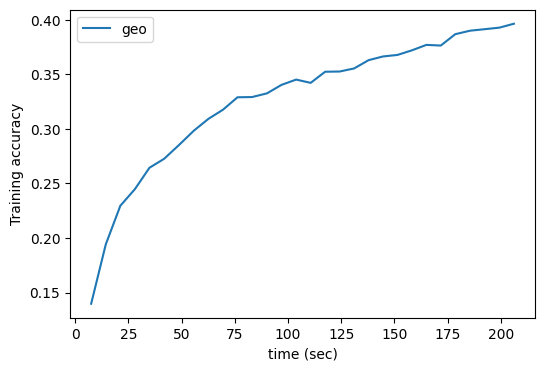

<Figure size 640x480 with 0 Axes>

In [56]:
pl.figure(figsize = (6,4))
# pl.plot(results_local[:,1], results[:,0], '-*', label = 'local')
pl.plot(results_geo[:,1], results[:,0], '-', label = 'geo')
pl.legend()
pl.ylabel('Training accuracy')

pl.xlabel('time (sec)')
pl.show()
pl.clf()